In [ ]:
import warnings

print('Hello')

# Settings the warnings to be ignored
# warnings.filterwarnings('ignore')

# This warning won't display due to the disabled warnings
# warnings.warn('Error: A warning just appeared')

print('Geeks !')

Hello
Geeks !


# Section I

## Encoding

### One Hot Encoding - variables with many categories

In [ ]:
import pandas as pd
import numpy as np

data = {
    'X1' : ['v', 't', 'w', 't', 'v', 's', 'l', 'r', 'z', 'f', 'u', 'f', 'p', 'd'],
    'X2' : ['at', 'av', 'n', 'n', 'n','av', 'at', 'as', 'f', 'f', 'f','f', 'p', 'f'],
    'X3' : ['a', 'e', 'c', 'f', 'f', 'by', 'ar', 'ab', 's', 'f', 'e', 'f', 'p', 'd'],
    'X4' : ['d', 'd', 'd', 'd', 'd', 'st', 'a', 'z', 'v', 'f', 'f', 'p', 'p', 'd'],
    'X5' : ['u', 'y', 'x', 'x', 'h', 'ad', 'ax', 'az', 'y', 'f', 'd', 'd', 'p', 'd'],
    'X6' : ['j', 'l', 'j', 'l', 'd', 'i', 'a', 'a', 'w', 'f', 'z', 'f', 'p', 'd']
}

df = pd.DataFrame(data)
df

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d
5,s,av,by,st,ad,i
6,l,at,ar,a,ax,a
7,r,as,ab,z,az,a
8,z,f,s,v,y,w
9,f,f,f,f,f,f


In [ ]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [ ]:
# lets have a look at how many lebels each variable has
for col in df.columns:
  print(col, ': ', len(df[col].unique()), 'labels')

X1 :  11 labels
X2 :  6 labels
X3 :  10 labels
X4 :  7 labels
X5 :  10 labels
X6 :  9 labels


In [ ]:
# lets examine how many columns we will obtain after one hot encoding these variables
pd.get_dummies(df, drop_first = True).shape

(14, 47)

so here we can see that from just 6 initial variables, we end up with total 12 variables

In [ ]:
# lets find the top 5 most frequent categories for the variable X2
df.X2.value_counts().sort_values(ascending = False)

X2
f     5
n     3
at    2
av    2
as    1
p     1
Name: count, dtype: int64

In [ ]:
# lets make a list with the most frequent categories of the variable

top_5 = [x for x in df.X2.value_counts().sort_values(ascending = False).head(5).index]
top_5

['f', 'n', 'at', 'av', 'as']

In [ ]:
# and now we make the 5 binary variables
for label in top_5:
  df[label] = np.where(df['X2'] == label, 1, 0)

df[['X2'] + top_5]

,X2,f,n,at,av,as
0,at,0,0,1,0,0
1,av,0,0,0,1,0
2,n,0,1,0,0,0
3,n,0,1,0,0,0
4,n,0,1,0,0,0
5,av,0,0,0,1,0
6,at,0,0,1,0,0
7,as,0,0,0,0,1
8,f,1,0,0,0,0
9,f,1,0,0,0,0


### One Hot Encoding Variables with Many Labels

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Complete-Feature-Engineering/master/mercedesbenz.csv")
df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1 = df[['X1', 'X2']]
df1

,X1,X2
0,v,at
1,t,av
2,w,n
3,t,n
4,v,n
...,...,...
4204,s,as
4205,o,t
4206,v,r
4207,r,e


In [ ]:
for cols in df1:
  print(df1[cols].unique())

['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']


In [ ]:
x1_count = len(df1['X1'].unique())
x1_count

27

In [ ]:
x2_count = len(df1['X2'].unique())
x2_count

44

In [ ]:
for columns in df1.columns:
  print(columns, ': ', len(df[columns].unique()), 'count of unique labels')

X1 :  27 count of unique labels
X2 :  44 count of unique labels


In [ ]:
df1.shape

(4209, 2)

In [ ]:
df1_dummy = pd.get_dummies(df1,drop_first = True)
df1_dummy.shape

(4209, 69)

In [ ]:
df1.X2.value_counts().sort_values(ascending=False).head(20)

X2
as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
ag      19
z       19
Name: count, dtype: int64

In [ ]:
top_10 = [i for i in df1.X2.value_counts().sort_values(ascending = False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [ ]:
def ohe_top_x(df1, variable, top_x_labels):
  for label in top_x_labels:
    df1[variable + '_' + label] = np.where(df1[variable] == label, 1, 0)

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Complete-Feature-Engineering/master/mercedesbenz.csv", usecols = ['X1', 'X2'])

ohe_top_x(data, 'X2', top_10)
data.head()

,X1,X2,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,0,0,0,0,0,0,0,0,0,0
1,t,av,0,0,0,0,0,0,0,0,0,0
2,w,n,0,0,0,0,0,0,1,0,0,0
3,t,n,0,0,0,0,0,0,1,0,0,0
4,v,n,0,0,0,0,0,0,1,0,0,0


### Count or frequency encoding

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Complete-Feature-Engineering/master/mercedesbenz.csv", usecols=['X1', 'X2'])

df.head()

,X1,X2
0,v,at
1,t,av
2,w,n
3,t,n
4,v,n


In [ ]:
df_frequency_count = df.X2.value_counts().to_dict()
df_frequency_count

{'as': 1659,
 'ae': 496,
 'ai': 415,
 'm': 367,
 'ak': 265,
 'r': 153,
 'n': 137,
 's': 94,
 'f': 87,
 'e': 81,
 'aq': 63,
 'ay': 54,
 'a': 47,
 't': 29,
 'k': 25,
 'i': 25,
 'b': 21,
 'ao': 20,
 'ag': 19,
 'z': 19,
 'd': 18,
 'ac': 13,
 'g': 12,
 'ap': 11,
 'y': 11,
 'x': 10,
 'aw': 8,
 'at': 6,
 'h': 6,
 'al': 5,
 'an': 5,
 'q': 5,
 'av': 4,
 'ah': 4,
 'p': 4,
 'au': 3,
 'am': 1,
 'j': 1,
 'af': 1,
 'l': 1,
 'aa': 1,
 'c': 1,
 'o': 1,
 'ar': 1}

In [ ]:
df.X2 = df.X2.map(df_frequency_count)
df

,X1,X2
0,v,6
1,t,4
2,w,137
3,t,137
4,v,137
...,...,...
4204,s,1659
4205,o,29
4206,v,153
4207,r,81


### Ordinal Encoding

In [ ]:
import pandas as pd
import datetime

In [ ]:
# create a variable with dates, and from that extract the weekday
df_base = datetime.datetime.today()
df_base

datetime.datetime(2024, 5, 28, 13, 3, 37, 955077)

In [ ]:
# I create a list of dates with 20 days difference from today
df_date_list = [df_base - datetime.timedelta(days = x) for x in range(0,20)]
df_date_list

[datetime.datetime(2024, 5, 28, 13, 3, 37, 955077),
 datetime.datetime(2024, 5, 27, 13, 3, 37, 955077),
 datetime.datetime(2024, 5, 26, 13, 3, 37, 955077),
 datetime.datetime(2024, 5, 25, 13, 3, 37, 955077),
 datetime.datetime(2024, 5, 24, 13, 3, 37, 955077),
 datetime.datetime(2024, 5, 23, 13, 3, 37, 955077),
 datetime.datetime(2024, 5, 22, 13, 3, 37, 955077),
 datetime.datetime(2024, 5, 21, 13, 3, 37, 955077),
 datetime.datetime(2024, 5, 20, 13, 3, 37, 955077),
 datetime.datetime(2024, 5, 19, 13, 3, 37, 955077),
 datetime.datetime(2024, 5, 18, 13, 3, 37, 955077),
 datetime.datetime(2024, 5, 17, 13, 3, 37, 955077),
 datetime.datetime(2024, 5, 16, 13, 3, 37, 955077),
 datetime.datetime(2024, 5, 15, 13, 3, 37, 955077),
 datetime.datetime(2024, 5, 14, 13, 3, 37, 955077),
 datetime.datetime(2024, 5, 13, 13, 3, 37, 955077),
 datetime.datetime(2024, 5, 12, 13, 3, 37, 955077),
 datetime.datetime(2024, 5, 11, 13, 3, 37, 955077),
 datetime.datetime(2024, 5, 10, 13, 3, 37, 955077),
 datetime.da

In [ ]:
# and then transform it into a datafame
df = pd.DataFrame(df_date_list)
df.head()

,0
0,2024-05-28 13:03:37.955077
1,2024-05-27 13:03:37.955077
2,2024-05-26 13:03:37.955077
3,2024-05-25 13:03:37.955077
4,2024-05-24 13:03:37.955077


In [ ]:
df.columns = ['day']
df


,day
0,2024-05-28 13:03:37.955077
1,2024-05-27 13:03:37.955077
2,2024-05-26 13:03:37.955077
3,2024-05-25 13:03:37.955077
4,2024-05-24 13:03:37.955077
5,2024-05-23 13:03:37.955077
6,2024-05-22 13:03:37.955077
7,2024-05-21 13:03:37.955077
8,2024-05-20 13:03:37.955077
9,2024-05-19 13:03:37.955077


In [ ]:
df['day_of_week'] = df['day'].dt.day_name()
df.head()

,day,day_of_week
0,2024-05-28 13:03:37.955077,Tuesday
1,2024-05-27 13:03:37.955077,Monday
2,2024-05-26 13:03:37.955077,Sunday
3,2024-05-25 13:03:37.955077,Saturday
4,2024-05-24 13:03:37.955077,Friday


In [ ]:
dayname_map = {
    'Monday' : 1,
    'Tuesday' : 2,
    'Wednesday' : 3,
    'Thursday' : 4,
    'Friday' : 5,
    'Saturday' : 6,
    'Sunday' : 7
}
df['dayname_ordinal'] = df.day_of_week.map(dayname_map)
df.head()

,day,day_of_week,dayname_ordinal
0,2024-05-28 13:03:37.955077,Tuesday,2
1,2024-05-27 13:03:37.955077,Monday,1
2,2024-05-26 13:03:37.955077,Sunday,7
3,2024-05-25 13:03:37.955077,Saturday,6
4,2024-05-24 13:03:37.955077,Friday,5


## Missing Values(Numerical) - Feature Engineering

### mean/median/mode imputation -

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This is a proper exaple of MCAR(Missing Completely At Random)

In [ ]:
df['Embarked']
df['Embarked'].isnull()
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
df['cabin_null'] = np.where(df['Cabin'].isnull(), 1, 0)
df.head()
print("The percent of missing values in 'Cabin' column is ", round(df['cabin_null'].mean()*100, 2),'%')

The percent of missing values in 'Cabin' column is  77.1 %


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [ ]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [ ]:
df1 = df[['Age', 'Fare', 'Survived']]
df1.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [ ]:
df1.isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [ ]:
def impute_nan(data, variable, median):
  data[variable + '_median'] = data[variable].fillna(median)

In [ ]:
median = df.Age.median()
median

28.0

In [ ]:
impute_nan(df1, 'Age', median)
df1.head()

<ipython-input-38-47019b92ce5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[variable + '_median'] = data[variable].fillna(median)


,Age,Fare,Survived,Age_median
0,22.0,7.2500,0,22.0
1,38.0,71.2833,1,38.0
2,26.0,7.9250,1,26.0
3,35.0,53.1000,1,35.0
4,35.0,8.0500,0,35.0


In [ ]:
print("Standard Deviation of 'Age' column - ", round(df1['Age'].std(), 2))
print(f"Standard Deviation of 'Age_median' column - {round(df1['Age_median'].std(), 2)}")

Standard Deviation of 'Age' column -  14.53
Standard Deviation of 'Age_median' column - 13.02


"\nfig = plt.figure()\nax = fig.add_subplot(111)\ndf['Age'].plot(kind='kde', ax=ax)\ndf.Age_median.plot(kind='kde', ax=ax, color='red')\nlines, labels = ax.get_legend_handles_labels()\nax.legend(lines, labels, loc='best')\n"

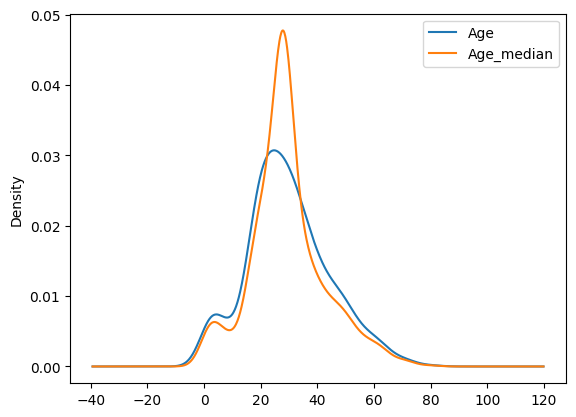

In [ ]:
fig = plt.figure()
df1['Age'].plot(kind = 'kde')
df1['Age_median'].plot(kind = 'kde')
plt.legend(['Age', 'Age_median'], loc = 'best')

'''
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
'''

### Random Sample Imputation -

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df= pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv", usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
# percentage of null values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
df['Age'].dropna().sample()

562    28.0
Name: Age, dtype: float64

In [ ]:
df1 = df['Age'].isnull().sum()
df1

177

In [ ]:
median = df['Age'].median()
median

28.0

In [ ]:
df['Age'].mean()

29.69911764705882

In [ ]:
df['Age'].dropna().sample(df1, random_state = 5)

789    46.0
114    17.0
92     46.0
51     21.0
539    22.0
       ... 
446    13.0
67     19.0
617    26.0
883    28.0
307    17.0
Name: Age, Length: 177, dtype: float64

In [ ]:
df[df['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [ ]:
def impute_nan_value(data, features, median):
  data[features + '_median'] = data[features].fillna(median)
  data[features + '_random'] = data[features]
  random_sample = data[features].dropna().sample(data[features].isnull().sum(), random_state = 7)
  random_sample.index = df[df[features].isnull()].index
  data.loc[df[features].isnull(), features + '_random'] = random_sample

  '''
  def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample


impute_nan(df,"Age",median)

df.head()
'''

In [ ]:
impute_nan_value(df,'Age', median)
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


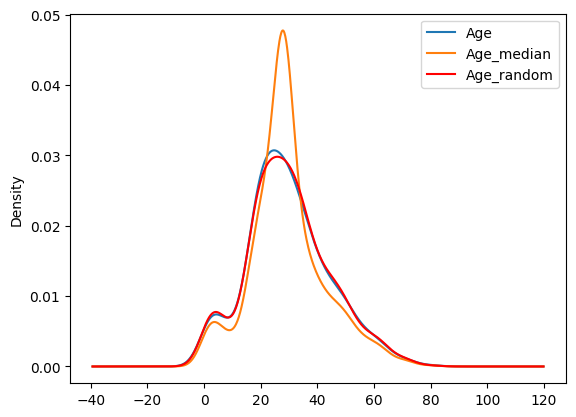

In [ ]:
fig = plt.figure()
df['Age'].plot(kind ='kde')
df['Age_median'].plot(kind = 'kde')
df['Age_random'].plot(kind = 'kde',color = 'red')
plt.legend(['Age', 'Age_median', 'Age_random'], loc = 'best')

### Capturing NaN Values with a new feature -

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv", usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df['Age_nan'] = np.where(df['Age'].isnull(),1,0)
df.head()

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [ ]:
df['Age'].median()

28.0

In [ ]:
round(df.Age.mean(), 2)

29.7

In [ ]:
df['Age'].fillna(df.Age.median(), inplace = True)
df.head(10)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### End of Distribution Imputation-

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv", usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

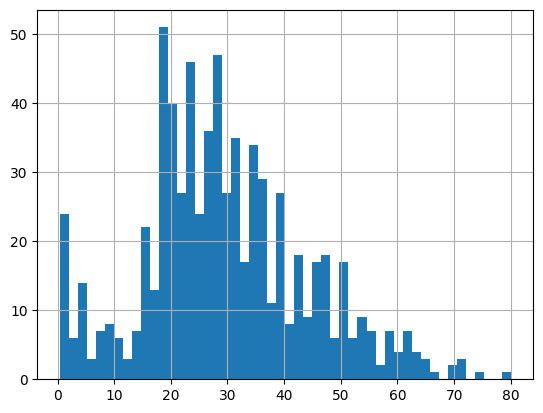

In [ ]:
df.Age.hist(grid = True, bins = 50)

In [ ]:
extreme_val = round((df.Age.mean()) + 3 * (df.Age.std()), 2)
extreme_val

73.28

<Axes: ylabel='Age'>

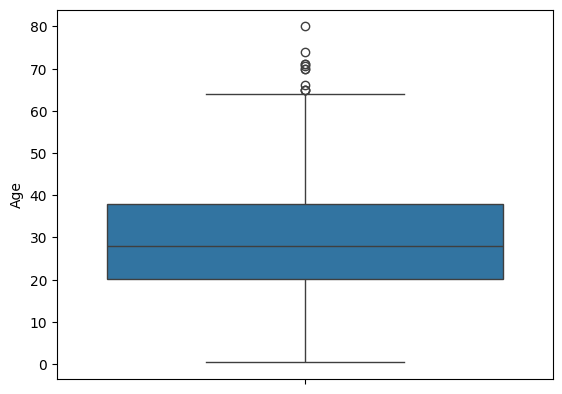

In [ ]:
sns.boxplot(y = 'Age', data = df, orient = 'v')

In [ ]:
def impute_nan_values(data, features, median, extreme_value):
  df[features + '_end_extreme'] = df[features].fillna(extreme_val)
  df[features].fillna(median, inplace = True)

In [ ]:
impute_nan_values(df, 'Age', df.Age.median(), extreme_val)
df.head()

,Survived,Age,Fare,Age_end_extreme
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [ ]:
df['Age'].isnull().sum()

0

In [ ]:
df['Age_end_extreme'].isnull().sum()

0

<Axes: >

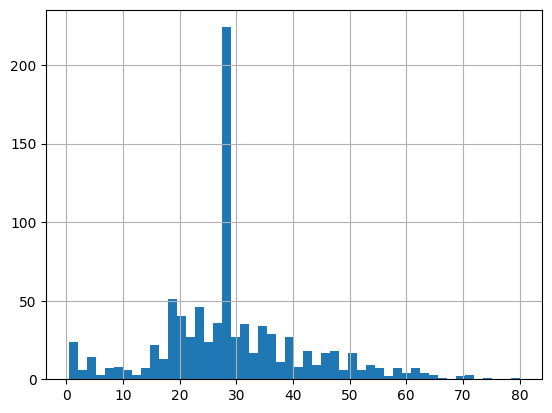

In [ ]:
df.Age.hist(bins = 50)

<Axes: >

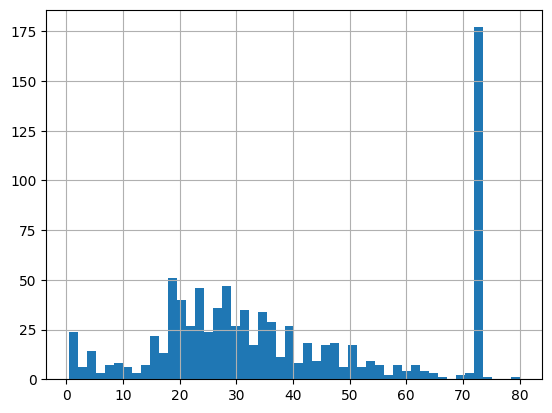

In [ ]:
df['Age_end_extreme'].hist(bins = 50)

<Axes: ylabel='Age'>

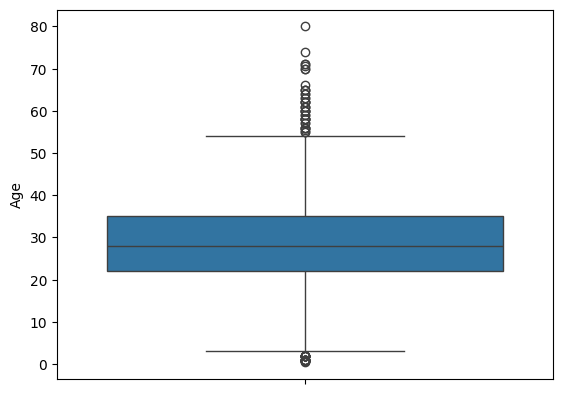

In [ ]:
sns.boxplot(y = 'Age', data = df)

<Axes: ylabel='Age_end_extreme'>

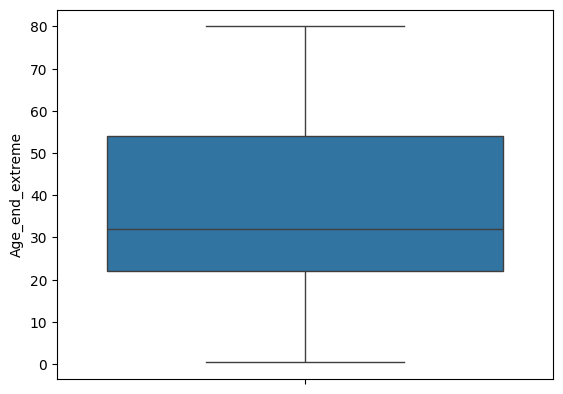

In [ ]:
sns.boxplot(y = 'Age_end_extreme', data = df)

### Arbitrary Value Imputation -

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
def impute_nan(data, features):
  data[features + '_zero'] = data[features].fillna(0)
  data[features + '_hundred'] = data[features].fillna(100)

In [ ]:
impute_nan(df, 'Age')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_zero,Age_hundred
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


<Axes: >

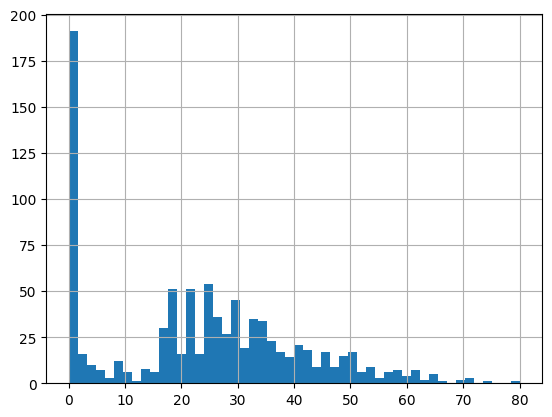

In [ ]:
df.Age_zero.hist(bins = 50)

<Axes: >

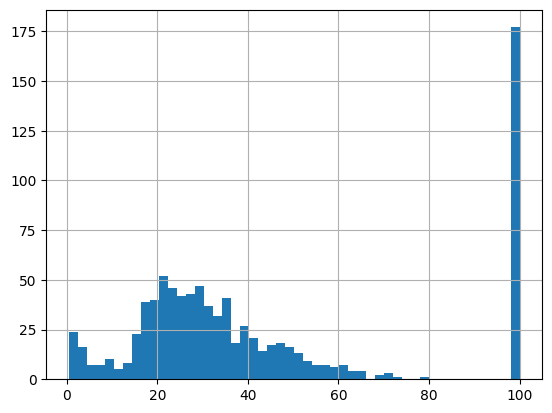

In [ ]:
df.Age_hundred.hist(bins = 50)

<Axes: xlabel='Age_zero'>

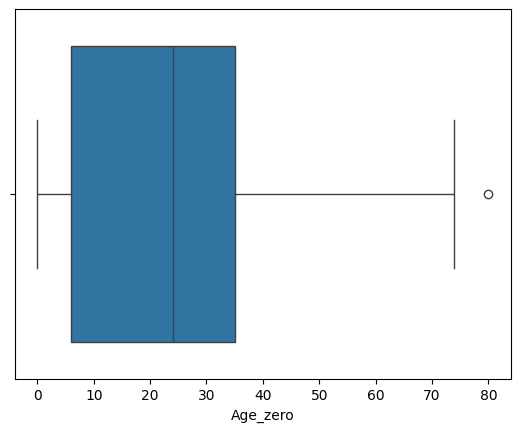

In [ ]:
sns.boxplot(x = 'Age_zero', data = df)

<Axes: xlabel='Age_hundred'>

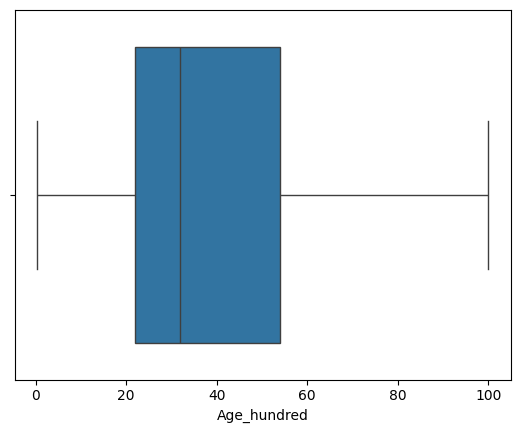

In [ ]:
sns.boxplot(x = 'Age_hundred', data = df)

## Missing Values(Categorical) - Feature Engineering

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Advanced-House-Price-Prediction-/master/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df = df[['BsmtQual','FireplaceQu','GarageType','SalePrice']]
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [ ]:
round(df.isnull().mean() * 100, 2).sort_values(ascending = True)

SalePrice       0.00
BsmtQual        2.53
GarageType      5.55
FireplaceQu    47.26
dtype: float64

In [ ]:
df.shape

(1460, 4)

### Compute The Frequency For Every Features

In [ ]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending = True)

BsmtQual
Fa     35
Ex    121
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [ ]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending = True)

GarageType
2Types       6
CarPort      9
Basment     19
BuiltIn     88
Detchd     387
Attchd     870
Name: GarageType, dtype: int64

<Axes: ylabel='BsmtQual'>

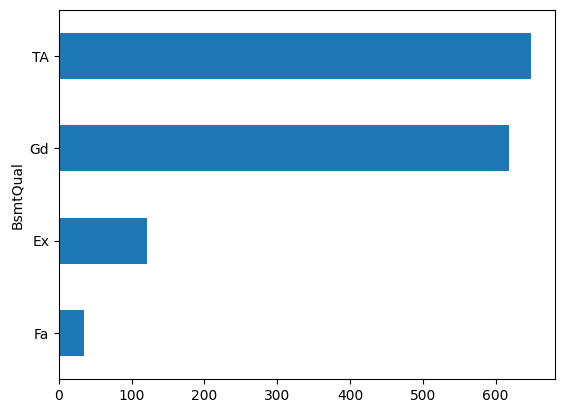

In [ ]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending = True).plot.barh()

<Axes: xlabel='GarageType'>

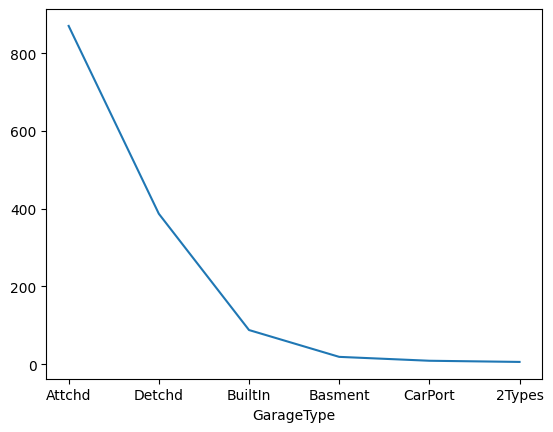

In [ ]:
df['GarageType'].value_counts().plot.line()

<Axes: xlabel='FireplaceQu'>

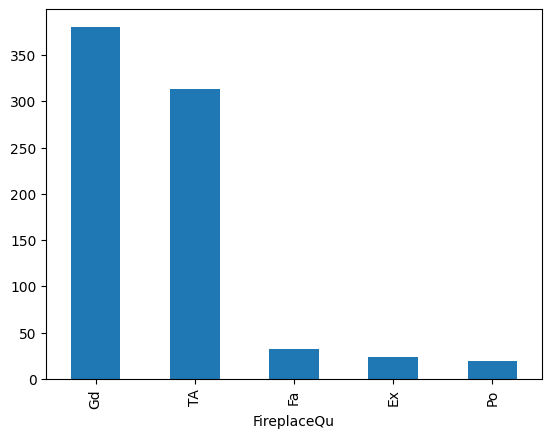

In [ ]:
df['FireplaceQu'].value_counts().plot.bar()

In [ ]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [ ]:
## another way
df['GarageType'].mode()[0]

'Attchd'

In [ ]:
def impute_nan(data, feature):
  most_freq_cat = df[feature].value_counts().index[0]
  df[feature].fillna(most_freq_cat, inplace = True)

In [ ]:
for feature in df:
  impute_nan(df, feature)

In [ ]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

### Adding a variable to capture NaN values

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Advanced-House-Price-Prediction-/master/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df1 = df[['BsmtQual','FireplaceQu','GarageType','SalePrice']]
df1.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
df1['BsmtQual'].isnull().value_counts()

BsmtQual
False    1423
True       37
Name: count, dtype: int64

In [ ]:
df1['BsmtQual_var'] = np.where(df1['BsmtQual'].isnull(), 1, 0)
df1.head()

<ipython-input-103-195d9e00c7b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BsmtQual_var'] = np.where(df1['BsmtQual'].isnull(), 1, 0)


,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [ ]:
frequent = df1['BsmtQual'].mode()[0]
frequent

'TA'

In [ ]:
df1['BsmtQual'].fillna(frequent, inplace = True)
df1.head()

<ipython-input-105-f2fc86e1ff33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BsmtQual'].fillna(frequent, inplace = True)


,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [ ]:
df1['BsmtQual'].isnull().value_counts()

BsmtQual
False    1460
Name: count, dtype: int64

In [ ]:
df1['BsmtQual_var'].value_counts()

BsmtQual_var
0    1423
1      37
Name: count, dtype: int64

In [ ]:
df2 = df[['BsmtQual','FireplaceQu','GarageType','SalePrice']]
df2.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
df2['FireplaceQu'].isnull().value_counts()

FireplaceQu
False    770
True     690
Name: count, dtype: int64

In [ ]:
df2['FireplaceQu_var'] = np.where(df2['FireplaceQu'].isnull(), 1, 0)
df2.head()

<ipython-input-110-9129133b4818>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['FireplaceQu_var'] = np.where(df2['FireplaceQu'].isnull(), 1, 0)


,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_var
0,Gd,NaN,Attchd,208500,1
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [ ]:
frequent = df2['FireplaceQu'].mode()[0]

In [ ]:
df2['FireplaceQu'].fillna(frequent, inplace = True)
df2.head()

<ipython-input-112-cc18401f85f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['FireplaceQu'].fillna(frequent, inplace = True)


,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_var
0,Gd,Gd,Attchd,208500,1
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [ ]:
df2['FireplaceQu'].isnull().value_counts()

FireplaceQu
False    1460
Name: count, dtype: int64

In [ ]:
df2['FireplaceQu_var'].value_counts()

FireplaceQu_var
0    770
1    690
Name: count, dtype: int64

### Suppose we have more frequent categories, we just replace NaN with a new category

In [ ]:
df3 = df[['BsmtQual','FireplaceQu','GarageType','SalePrice']]
df3.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
def impute_nan(data, feature):
  data[feature + '_new_var'] = np.where(data[feature].isnull(), 'Missing', data[feature])

In [ ]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
  impute_nan(df3, feature)

<ipython-input-116-3d353536622d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature + '_new_var'] = np.where(data[feature].isnull(), 'Missing', data[feature])
<ipython-input-116-3d353536622d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature + '_new_var'] = np.where(data[feature].isnull(), 'Missing', data[feature])
<ipython-input-116-3d353536622d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [ ]:
df3.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new_var,FireplaceQu_new_var,GarageType_new_var
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [ ]:
df3[df3['GarageType_new_var'] == 'Missing'].value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
df3.drop(['BsmtQual','FireplaceQu','GarageType'], axis = 1, inplace = True)

<ipython-input-120-0fd8edeec334>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(['BsmtQual','FireplaceQu','GarageType'], axis = 1, inplace = True)


In [ ]:
df3.head()

,SalePrice,BsmtQual_new_var,FireplaceQu_new_var,GarageType_new_var
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


## Handling Categorical Features

### One Hot Encoding

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df1 = df[['Sex']]
df1.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [ ]:
pd.get_dummies(df1, drop_first = True).head()

,Sex_male
0,True
1,False
2,False
3,False
4,True


In [ ]:
df2 = df[['Embarked']]
df2.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [ ]:
df2['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df2['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
df2.dropna(inplace = True)

<ipython-input-128-6c3633892e9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace = True)


In [ ]:
pd.get_dummies(df2, drop_first=False).head()

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Complete-Feature-Engineering/master/mercedesbenz.csv")
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1 = df[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
df1.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [ ]:
df1['X0'].value_counts().unique()

array([360, 349, 324, 313, 306, 300, 269, 227, 195, 182, 181, 175, 151,
       106, 103,  75,  73,  67,  36,  35,  34,  32,  27,  25,  21,  19,
        18,  17,  16,  14,  11,  10,   6,   4,   3,   2,   1])

In [ ]:
len(df1['X0'].unique())

47

In [ ]:
df1.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [ ]:
for i in df1.columns:
  print(i, ' : ', len(df1[i].unique()))

X0  :  47
X1  :  27
X2  :  44
X3  :  7
X4  :  4
X5  :  29
X6  :  12


In [ ]:
df1.X1.value_counts().sort_values(ascending = False).head(10).index

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object', name='X1')

In [ ]:
lst_10 = df1.X1.value_counts().sort_values(ascending = False).head(10).index
lst_10 = list(lst_10)
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [ ]:
lst_10.append('X1')
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o', 'X1']

In [ ]:
df1.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [ ]:
for categories in lst_10:
  df1[categories] = np.where(df1['X1'] == categories, 1, 0)

<ipython-input-140-2ab3f957b989>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[categories] = np.where(df1['X1'] == categories, 1, 0)
<ipython-input-140-2ab3f957b989>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[categories] = np.where(df1['X1'] == categories, 1, 0)
<ipython-input-140-2ab3f957b989>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [ ]:
df1[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,1,0
4206,0,0,0,0,1,0,0,0,0,0,0
4207,0,0,0,0,0,1,0,0,0,0,0


### Ordinal Number Encoding

In [ ]:
import datetime
import pandas as pd

In [ ]:
today = datetime.datetime.today()
today

datetime.datetime(2024, 5, 28, 13, 3, 54, 82243)

In [ ]:
today - datetime.timedelta(2)

datetime.datetime(2024, 5, 26, 13, 3, 54, 82243)

In [ ]:
# List Comprehension
days = [today - datetime.timedelta(x) for x in range (0,10)]
days

[datetime.datetime(2024, 5, 28, 13, 3, 54, 82243),
 datetime.datetime(2024, 5, 27, 13, 3, 54, 82243),
 datetime.datetime(2024, 5, 26, 13, 3, 54, 82243),
 datetime.datetime(2024, 5, 25, 13, 3, 54, 82243),
 datetime.datetime(2024, 5, 24, 13, 3, 54, 82243),
 datetime.datetime(2024, 5, 23, 13, 3, 54, 82243),
 datetime.datetime(2024, 5, 22, 13, 3, 54, 82243),
 datetime.datetime(2024, 5, 21, 13, 3, 54, 82243),
 datetime.datetime(2024, 5, 20, 13, 3, 54, 82243),
 datetime.datetime(2024, 5, 19, 13, 3, 54, 82243)]

In [ ]:
data = pd.DataFrame(days)
data.columns = ['days']
data

,days
0,2024-05-28 13:03:54.082243
1,2024-05-27 13:03:54.082243
2,2024-05-26 13:03:54.082243
3,2024-05-25 13:03:54.082243
4,2024-05-24 13:03:54.082243
5,2024-05-23 13:03:54.082243
6,2024-05-22 13:03:54.082243
7,2024-05-21 13:03:54.082243
8,2024-05-20 13:03:54.082243
9,2024-05-19 13:03:54.082243


In [ ]:
data['days'].dt.date

0    2024-05-28
1    2024-05-27
2    2024-05-26
3    2024-05-25
4    2024-05-24
5    2024-05-23
6    2024-05-22
7    2024-05-21
8    2024-05-20
9    2024-05-19
Name: days, dtype: object

In [ ]:
data['days'].dt.year

0    2024
1    2024
2    2024
3    2024
4    2024
5    2024
6    2024
7    2024
8    2024
9    2024
Name: days, dtype: int32

In [ ]:
data['days'].dt.month_name()

0    May
1    May
2    May
3    May
4    May
5    May
6    May
7    May
8    May
9    May
Name: days, dtype: object

In [ ]:
data['days'].dt.month

0    5
1    5
2    5
3    5
4    5
5    5
6    5
7    5
8    5
9    5
Name: days, dtype: int32

In [ ]:
data['days'].dt.hour

0    13
1    13
2    13
3    13
4    13
5    13
6    13
7    13
8    13
9    13
Name: days, dtype: int32

In [ ]:
data['days'].dt.minute

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: days, dtype: int32

In [ ]:
data['days'].dt.second

0    54
1    54
2    54
3    54
4    54
5    54
6    54
7    54
8    54
9    54
Name: days, dtype: int32

In [ ]:
data['days'].dt.day_of_year

0    149
1    148
2    147
3    146
4    145
5    144
6    143
7    142
8    141
9    140
Name: days, dtype: int32

In [ ]:
data['days'].dt.day_name()

0      Tuesday
1       Monday
2       Sunday
3     Saturday
4       Friday
5     Thursday
6    Wednesday
7      Tuesday
8       Monday
9       Sunday
Name: days, dtype: object

In [ ]:
data['weekday_name'] = data['days'].dt.day_name()
data

,days,weekday_name
0,2024-05-28 13:03:54.082243,Tuesday
1,2024-05-27 13:03:54.082243,Monday
2,2024-05-26 13:03:54.082243,Sunday
3,2024-05-25 13:03:54.082243,Saturday
4,2024-05-24 13:03:54.082243,Friday
5,2024-05-23 13:03:54.082243,Thursday
6,2024-05-22 13:03:54.082243,Wednesday
7,2024-05-21 13:03:54.082243,Tuesday
8,2024-05-20 13:03:54.082243,Monday
9,2024-05-19 13:03:54.082243,Sunday


In [ ]:
dictionary = {
    'Sunday' : 7,
    'Monday' : 1,
    'Tuesday' : 2,
    'Wednesday' : 3,
    'Thursday' : 4,
    'Friday' : 5,
    'Saturday' : 6
}
dictionary

{'Sunday': 7,
 'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6}

In [ ]:
data['weekday_ordinal'] = data['weekday_name'].map(dictionary)
data['weekday_ordinal'] = data['weekday_ordinal'].astype(int)
data


,days,weekday_name,weekday_ordinal
0,2024-05-28 13:03:54.082243,Tuesday,2
1,2024-05-27 13:03:54.082243,Monday,1
2,2024-05-26 13:03:54.082243,Sunday,7
3,2024-05-25 13:03:54.082243,Saturday,6
4,2024-05-24 13:03:54.082243,Friday,5
5,2024-05-23 13:03:54.082243,Thursday,4
6,2024-05-22 13:03:54.082243,Wednesday,3
7,2024-05-21 13:03:54.082243,Tuesday,2
8,2024-05-20 13:03:54.082243,Monday,1
9,2024-05-19 13:03:54.082243,Sunday,7


### Count or Frequency Encoding

In [ ]:
import pandas as pd
train_set = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header = None, index_col = None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
train_set[1].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
# find out the numerical and categorical columns
numeric_features = [feature for feature in train_set.columns if train_set[feature].dtype != 'O']
categorical_features = [feature for feature in train_set.columns if train_set[feature].dtype == 'O']

print(f'Numerical Features Count: {len(numeric_features)},\n and Features are : {numeric_features}')
print(f'\nWe have {len(categorical_features)} Categorical Features and those are {categorical_features}')

Numerical Features Count: 6,
 and Features are : [0, 2, 4, 10, 11, 12]

We have 9 Categorical Features and those are [1, 3, 5, 6, 7, 8, 9, 13, 14]


In [ ]:
df = train_set[categorical_features]
df.head()

,1,3,5,6,7,8,9,13,14
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [ ]:
df.columns = ['employment', 'degree', 'marital_status', 'designation', 'relation', 'race', 'sex', 'country', 'income']
df.head()

,employment,degree,marital_status,designation,relation,race,sex,country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [ ]:
df['income'].value_counts()

income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

In [ ]:
for i in df.columns:
  print(df[i].value_counts(),'\n')

employment
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64 

degree
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64 

marital_status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64 

designation
 Prof-specialty       4140
 Craft-re

In [ ]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
for feature in df.columns[:]:
  print(feature, ':', len(df[feature].unique()), 'labels')

employment : 9 labels
degree : 16 labels
marital_status : 7 labels
designation : 15 labels
relation : 6 labels
race : 5 labels
sex : 2 labels
country : 42 labels
income : 2 labels


In [ ]:
df.head()

,employment,degree,marital_status,designation,relation,race,sex,country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [ ]:
country_map = df['country'].value_counts().to_dict()

In [ ]:
df['country'] = df['country'].map(country_map)
df.head()

<ipython-input-187-4dc400b0ba26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['country'].map(country_map)


,employment,degree,marital_status,designation,relation,race,sex,country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95,<=50K


### Target Guided Ordinal Encoding


1.   Ordering labels according to the target
2.   Replace the labels by the joint probability of being 1 or 0



In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df = df[['Cabin', 'Survived']]
df.head()

,Cabin,Survived
0,NaN,0
1,C85,1
2,NaN,1
3,C123,1
4,NaN,0


In [ ]:
df['Cabin'].fillna('missing', inplace = True)
df.head()

,Cabin,Survived
0,missing,0
1,C85,1
2,missing,1
3,C123,1
4,missing,0


In [ ]:
df['Cabin'] = df['Cabin'].astype(str).str[0]
df.head()

,Cabin,Survived
0,m,0
1,C,1
2,m,1
3,C,1
4,m,0


In [ ]:
df.Cabin.unique()

array(['m', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
df.groupby(['Cabin'])['Survived'].mean().round(4) * 100

Cabin
A    46.67
B    74.47
C    59.32
D    75.76
E    75.00
F    61.54
G    50.00
T     0.00
m    29.99
Name: Survived, dtype: float64

In [ ]:
df.groupby(['Cabin'])['Survived'].mean().sort_values()

Cabin
T    0.000000
m    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64

In [ ]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'm', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [ ]:
ordinal_labels = df.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [ ]:
ordinal_labels_2 = {k : i for i, k in enumerate(ordinal_labels, 1)}
ordinal_labels_2

{'T': 1, 'm': 2, 'A': 3, 'G': 4, 'C': 5, 'F': 6, 'B': 7, 'E': 8, 'D': 9}

In [ ]:
df['cabin_ordinal_labels'] = df['Cabin'].map(ordinal_labels_2)
df.head()

,Cabin,Survived,cabin_ordinal_labels
0,m,0,2
1,C,1,5
2,m,1,2
3,C,1,5
4,m,0,2


### Mean Encoding

In [ ]:
mean_ordinal = df.groupby(['Cabin'])['Survived'].mean().round(4) * 100
mean_ordinal

Cabin
A    46.67
B    74.47
C    59.32
D    75.76
E    75.00
F    61.54
G    50.00
T     0.00
m    29.99
Name: Survived, dtype: float64

In [ ]:
df['Cabin_mean_encoding'] = df['Cabin'].map(mean_ordinal)
df.head()

,Cabin,Survived,cabin_ordinal_labels,Cabin_mean_encoding
0,m,0,2,29.99
1,C,1,5,59.32
2,m,1,2,29.99
3,C,1,5,59.32
4,m,0,2,29.99


In [ ]:
df.rename(columns = {'Cabin_mean_encoding' : 'Cabin_mean_encoding(%)'}, inplace = True)
df.head()

,Cabin,Survived,cabin_ordinal_labels,Cabin_mean_encoding(%)
0,m,0,2,29.99
1,C,1,5,59.32
2,m,1,2,29.99
3,C,1,5,59.32
4,m,0,2,29.99


### Probability Ratio Encoding

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df = df[['Cabin', 'Survived']]
df.head()

,Cabin,Survived
0,NaN,0
1,C85,1
2,NaN,1
3,C123,1
4,NaN,0


In [ ]:
df['Cabin'].fillna('missing', inplace = True)
df.head()

,Cabin,Survived
0,missing,0
1,C85,1
2,missing,1
3,C123,1
4,missing,0


In [ ]:
df['Cabin'] = df['Cabin'].astype(str).str[0]
df.head()

,Cabin,Survived
0,m,0
1,C,1
2,m,1
3,C,1
4,m,0


In [ ]:
df['Cabin'].unique()

array(['m', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
m    0.299854
Name: Survived, dtype: float64

In [ ]:
mean_ordinal = df.groupby(['Cabin'])['Survived'].mean().round(4) * 100

In [ ]:
mean_ordinal = pd.DataFrame(mean_ordinal)
mean_ordinal.head()

,Survived
Cabin,
A,46.67
B,74.47
C,59.32
D,75.76
E,75.00


In [ ]:
mean_ordinal['Died'] = 100 - mean_ordinal['Survived']
mean_ordinal.head()

,Survived,Died
Cabin,,
A,46.67,53.33
B,74.47,25.53
C,59.32,40.68
D,75.76,24.24
E,75.00,25.00


In [ ]:
mean_ordinal.rename(columns = {'Survived': 'Survived(%)', 'Died' : 'Died(%)'}, inplace = True)
mean_ordinal.head()

,Survived(%),Died(%)
Cabin,,
A,46.67,53.33
B,74.47,25.53
C,59.32,40.68
D,75.76,24.24
E,75.00,25.00


In [ ]:
mean_ordinal['probability_ratio'] = (mean_ordinal['Survived(%)'] / mean_ordinal['Died(%)']).round(4) * 100
mean_ordinal.head()

,Survived(%),Died(%),probability_ratio
Cabin,,,
A,46.67,53.33,87.51
B,74.47,25.53,291.70
C,59.32,40.68,145.82
D,75.76,24.24,312.54
E,75.00,25.00,300.00


In [ ]:
mean_ordinal.rename(columns = {'probability_ratio' : 'probability_ratio(%)'}, inplace = True)
mean_ordinal.head()

,Survived(%),Died(%),probability_ratio(%)
Cabin,,,
A,46.67,53.33,87.51
B,74.47,25.53,291.70
C,59.32,40.68,145.82
D,75.76,24.24,312.54
E,75.00,25.00,300.00


In [ ]:
mean_ordinal['probability_ratio(%)'].to_dict()

{'A': 87.51,
 'B': 291.7,
 'C': 145.82,
 'D': 312.54,
 'E': 300.0,
 'F': 160.01000000000002,
 'G': 100.0,
 'T': 0.0,
 'm': 42.84}

In [ ]:
probability_encoded = mean_ordinal['probability_ratio(%)'].to_dict()

In [ ]:
df['Cabin_encoded'] = df['Cabin'].map(probability_encoded)
df.head()

,Cabin,Survived,Cabin_encoded
0,m,0,42.84
1,C,1,145.82
2,m,1,42.84
3,C,1,145.82
4,m,0,42.84


## Normalization and Standerization

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']

print(f"Numeric Features - \n{cat_features} : {len(cat_features)}")
print(f"categorical Features - \n{num_features} : {len(num_features)}")

Numeric Features - 
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] : 5
categorical Features - 
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] : 7


In [ ]:
df_1 = df[num_features]
df_1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
df_1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [ ]:
df_1.fillna(df_1.Age.median(), inplace = True)
df_1.isnull().sum()

<ipython-input-9-9142fea5e587>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.fillna(df_1.Age.median(), inplace = True)


PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

## Standardization -

z score = (x - x_mean) / std

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_1)
df_scaled

array([[-1.73010796, -0.78927234,  0.82737724, ...,  0.43279337,
        -0.47367361, -0.50244517],
       [-1.72622007,  1.2669898 , -1.56610693, ...,  0.43279337,
        -0.47367361,  0.78684529],
       [-1.72233219,  1.2669898 ,  0.82737724, ..., -0.4745452 ,
        -0.47367361, -0.48885426],
       ...,
       [ 1.72233219, -0.78927234,  0.82737724, ...,  0.43279337,
         2.00893337, -0.17626324],
       [ 1.72622007,  1.2669898 , -1.56610693, ..., -0.4745452 ,
        -0.47367361, -0.04438104],
       [ 1.73010796, -0.78927234,  0.82737724, ..., -0.4745452 ,
        -0.47367361, -0.49237783]])

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns = df_1.columns)
df_scaled.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,-1.730108,-0.789272,0.827377,-0.565736,0.432793,-0.473674,-0.502445
1,-1.726220,1.266990,-1.566107,0.663861,0.432793,-0.473674,0.786845
2,-1.722332,1.266990,0.827377,-0.258337,-0.474545,-0.473674,-0.488854
3,-1.718444,1.266990,-1.566107,0.433312,0.432793,-0.473674,0.420730
4,-1.714556,-0.789272,0.827377,0.433312,-0.474545,-0.473674,-0.486337


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([-0.78927234, -0.68645923, -0.58364612, -0.48083301, -0.37801991,
        -0.2752068 , -0.17239369, -0.06958059,  0.03323252,  0.13604563,
         0.23885873,  0.34167184,  0.44448495,  0.54729805,  0.65011116,
         0.75292427,  0.85573737,  0.95855048,  1.06136359,  1.16417669,
         1.2669898 ]),
 <BarContainer object of 20 artists>)

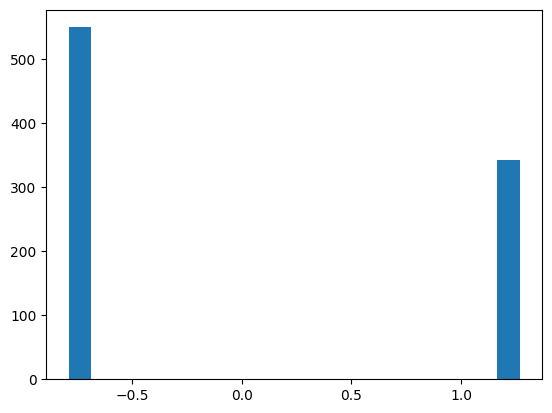

In [ ]:
plt.hist(df_scaled['Survived'],bins = 20)

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

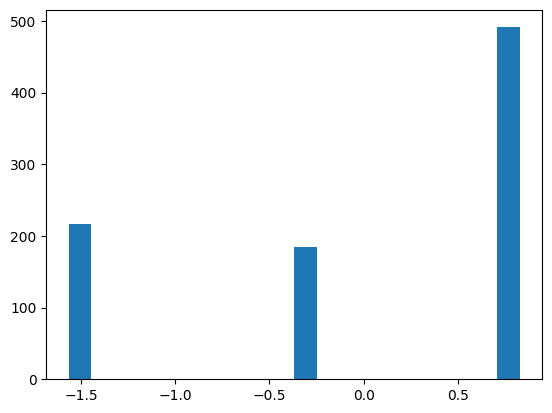

In [ ]:
plt.hist(df_scaled['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

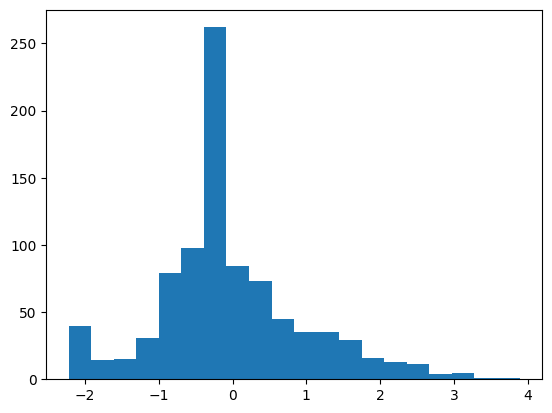

In [ ]:
plt.hist(df_scaled['Age'],bins=20)

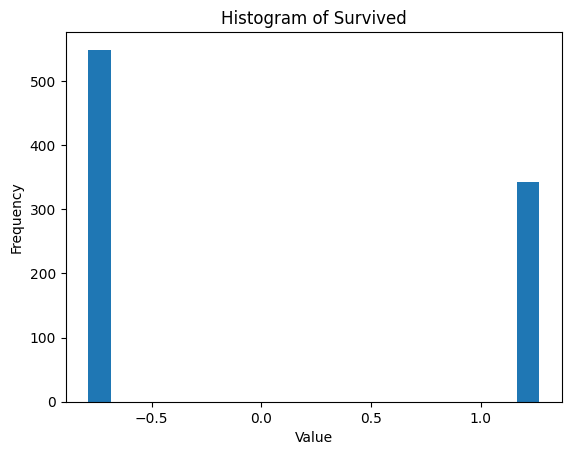

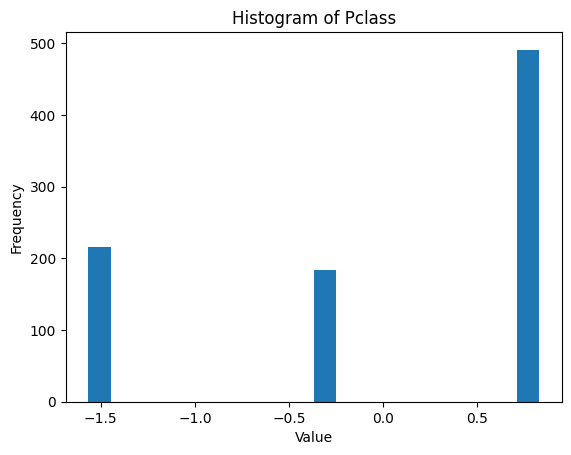

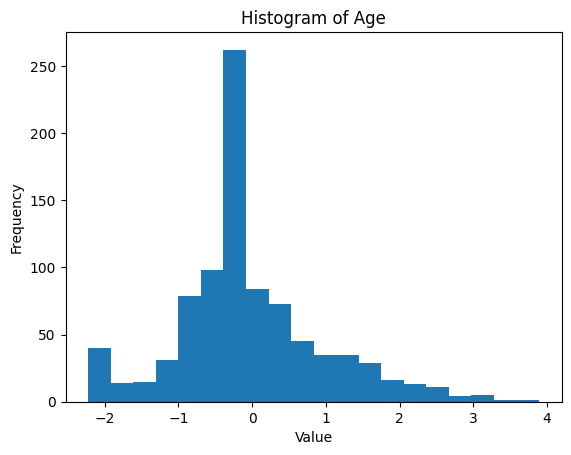

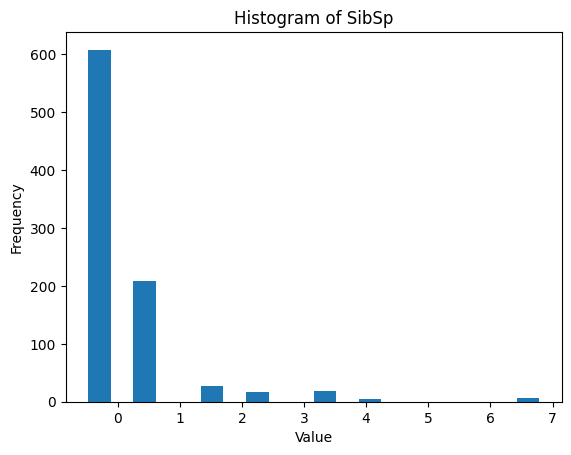

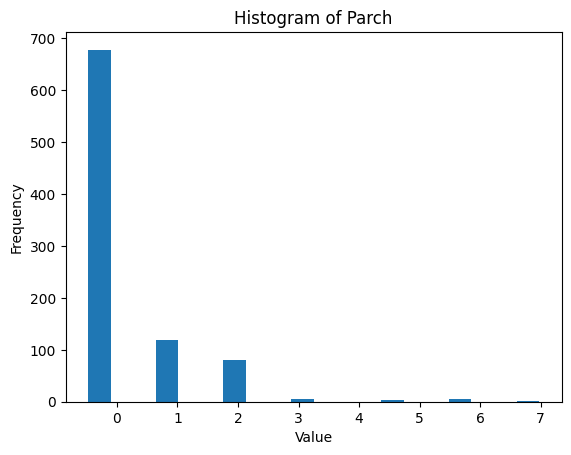

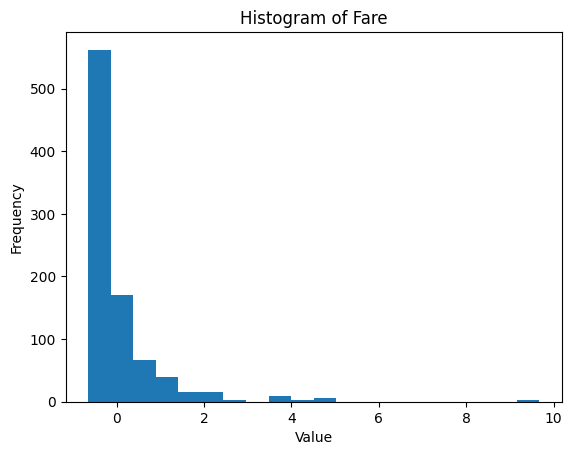

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Exclude the first column ("PassengerId")
columns_to_plot = df_scaled.iloc[:, 1:].select_dtypes(include=[np.number]).columns.tolist()

for col in columns_to_plot:
  plt.hist(df_scaled[col], bins=20)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {col}')
  plt.show()
  plt.clf()


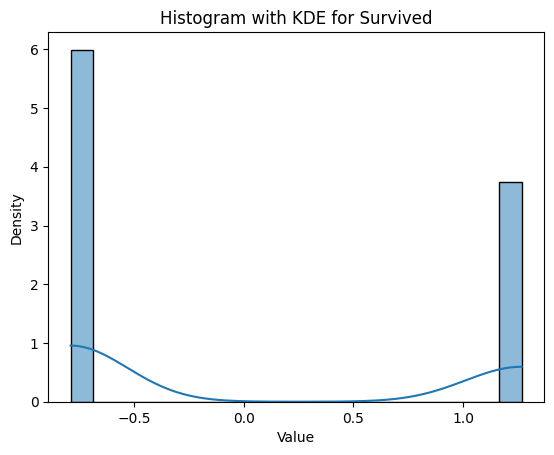

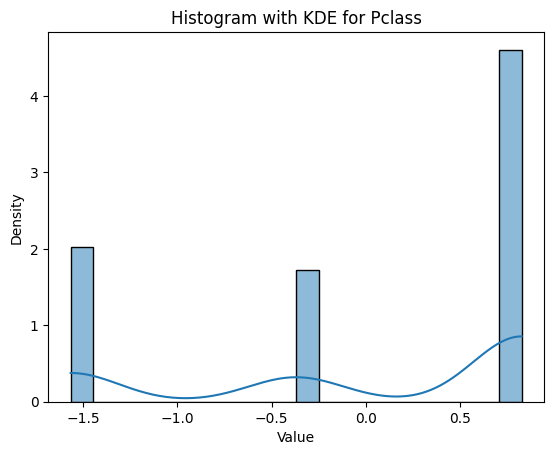

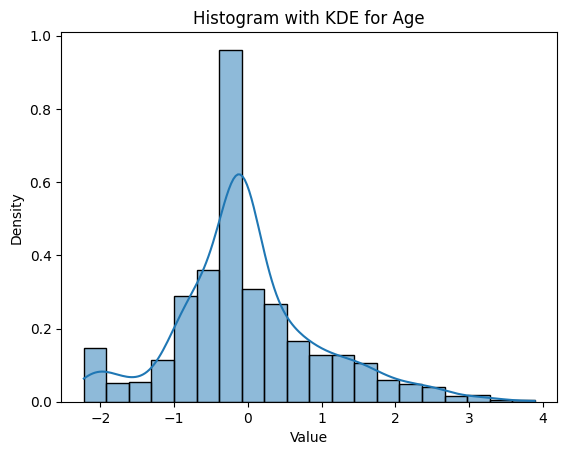

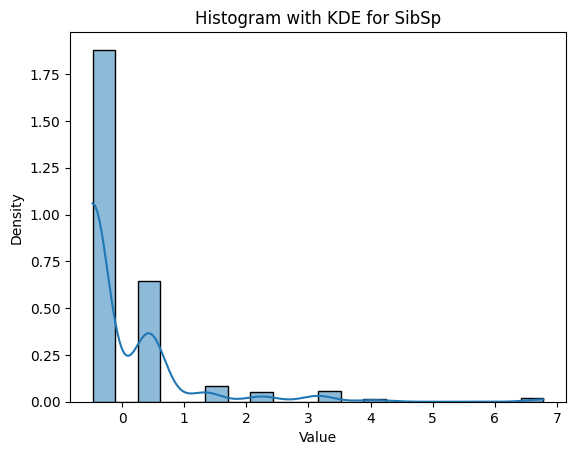

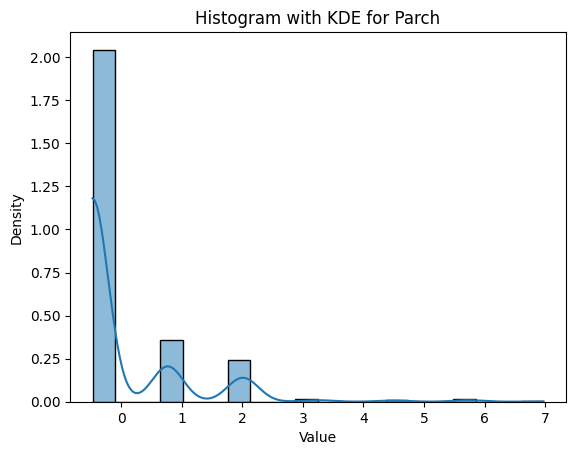

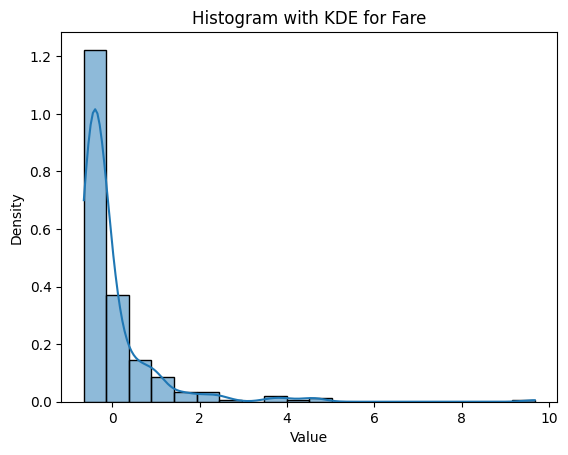

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for easier KDE plotting

# Exclude the first column ("PassengerId")
columns_to_plot = df_scaled.iloc[:, 1:].select_dtypes(include=[np.number]).columns.tolist()

for col in columns_to_plot:
  fig, ax = plt.subplots()  # Create a figure and axes for each column
  sns.histplot(df_scaled[col], bins=20, kde=True, stat="density", ax=ax)  # Use seaborn for combined plot
  ax.set_xlabel('Value')
  ax.set_ylabel('Density')
  ax.set_title(f'Histogram with KDE for {col}')
  plt.show()


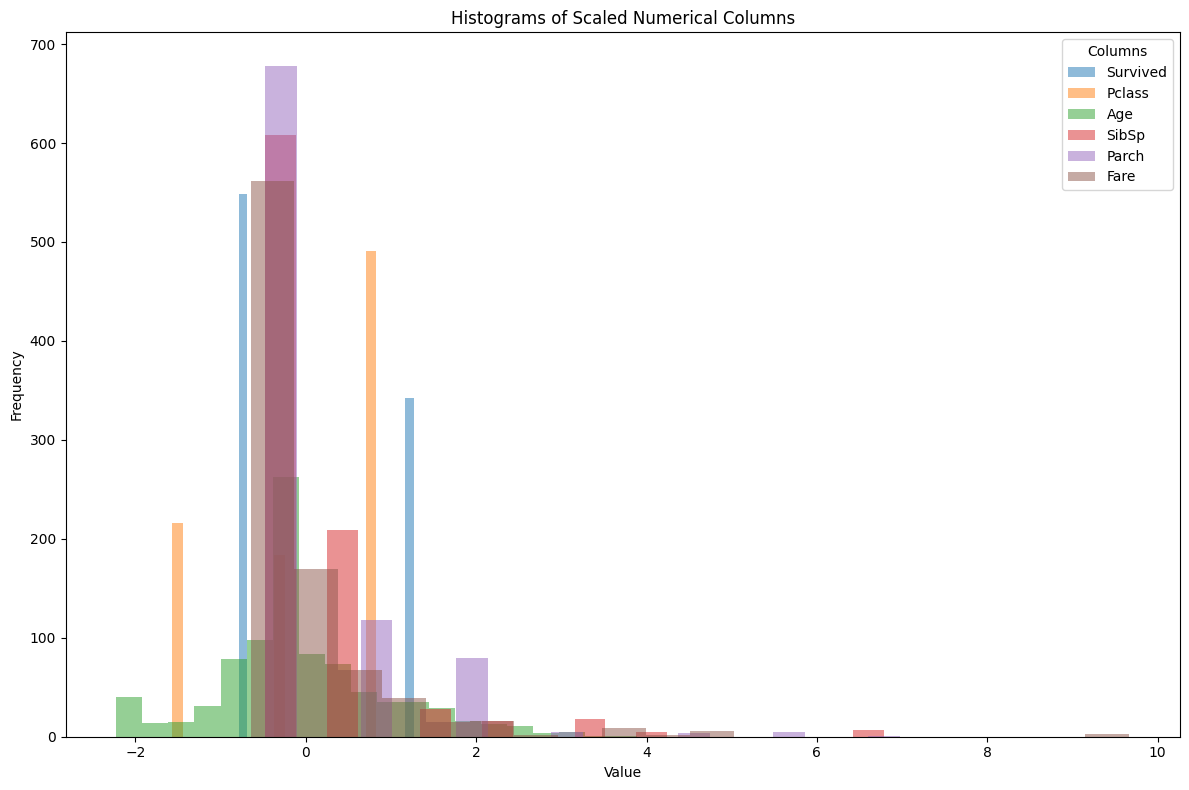

In [ ]:
import matplotlib.pyplot as plt

num_columns = len(df_scaled.iloc[:,1:].select_dtypes(include=[np.number]))  # Select numerical columns

plt.figure(figsize=(12, 8))  # Increased figure size for better readability

for i, col in enumerate(df_scaled.iloc[:,1:].select_dtypes(include=[np.number])):
    # Use enumerate to get column name directly
    plt.hist(df_scaled[col], bins=20, alpha=0.5, label=col)

plt.legend(title='Columns')  # More descriptive legend title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Scaled Numerical Columns')
plt.tight_layout()  # Adjust spacing for better visualization
plt.show()


## Min - Max Scaling -

Xscaled = (X - Xmin) / (Xmax - Xmin)

In [ ]:
df_1.iloc[:, 1:]

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,28.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [ ]:
df_1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df_1), columns = df_1.columns)
df_minmax.head()

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <BarContainer object of 20 artists>)

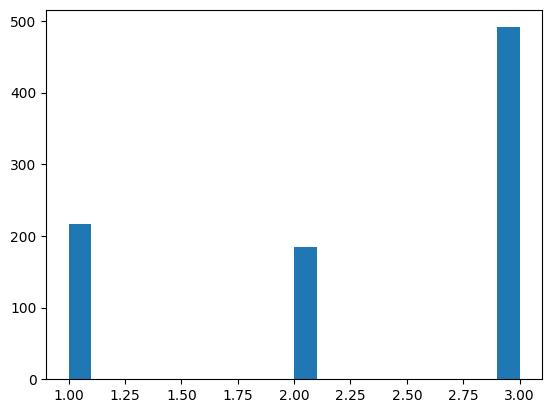

In [ ]:
plt.hist(df_1['Pclass'], bins = 20)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

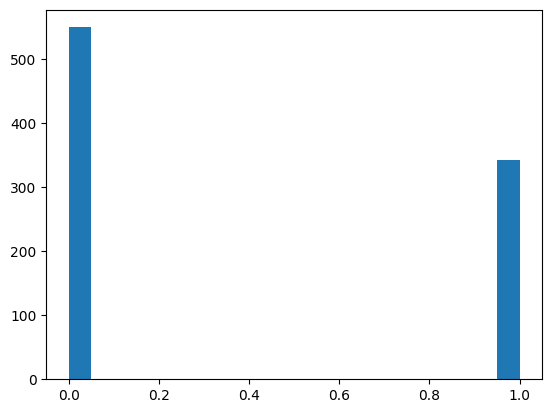

In [ ]:
plt.hist(df_1['Survived'], bins = 20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

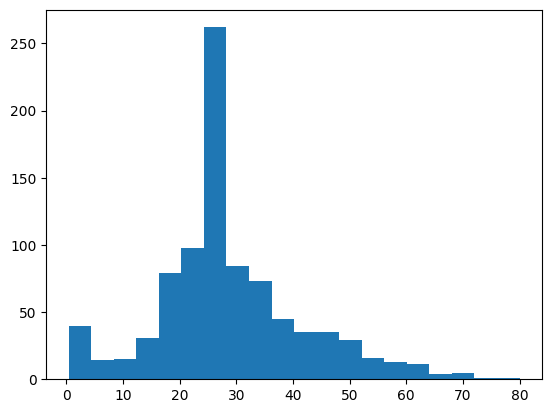

In [ ]:
plt.hist(df_1['Age'], bins = 20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

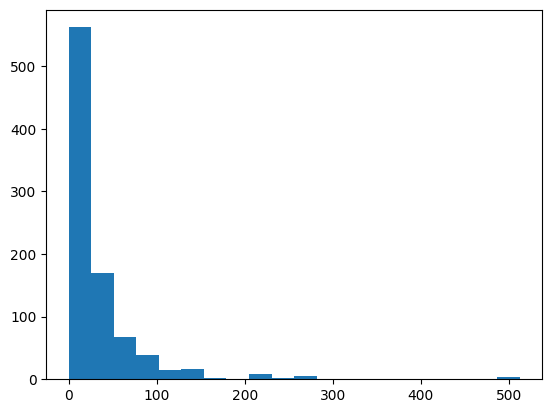

In [ ]:
plt.hist(df_1['Fare'], bins = 20)

## Robust Scaling -

In [ ]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
df_robust = pd.DataFrame(robust_scaler.fit_transform(df_1), columns = df_1.columns)
df_robust.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,-1.000000,0.0,0.0,-0.461538,1.0,0.0,-0.312011
1,-0.997753,1.0,-2.0,0.769231,1.0,0.0,2.461242
2,-0.995506,1.0,0.0,-0.153846,0.0,0.0,-0.282777
3,-0.993258,1.0,-2.0,0.538462,1.0,0.0,1.673732
4,-0.991011,0.0,0.0,0.538462,0.0,0.0,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

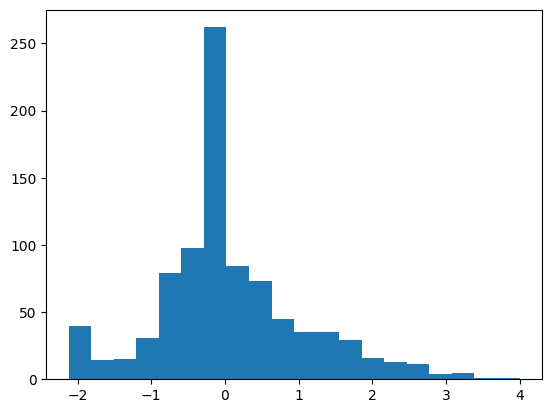

In [ ]:
plt.hist(df_robust['Age'], bins = 20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

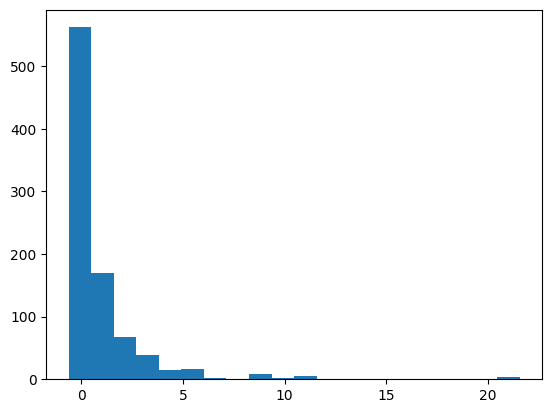

In [ ]:
plt.hist(df_robust['Fare'], bins = 20)

## Gaussian Transformation

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv", usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age'].isna().sum()

0

If I want to check the dataset whether normally distributed I need to plot Q-Q plot

In [ ]:
import scipy.stats as stat
import pylab

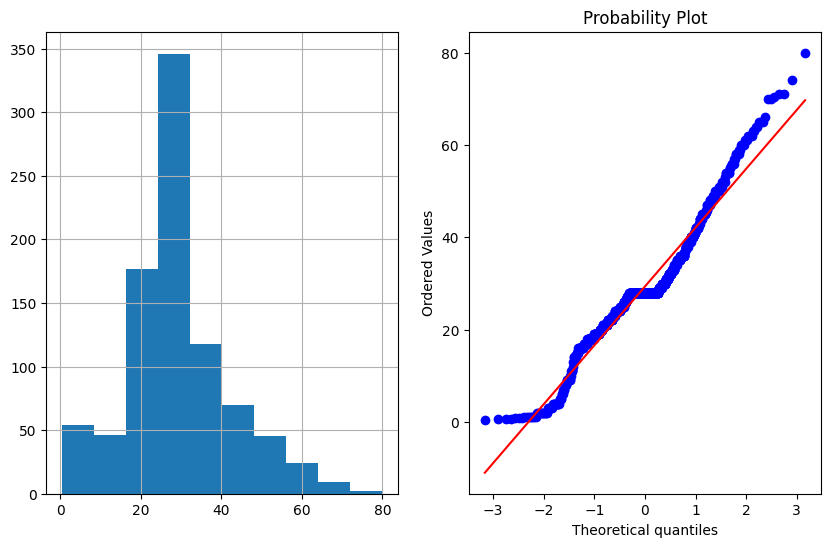

In [ ]:
def plot_data(df, feature):
  plt.figure(figsize = (10,6))
  plt.subplot(1,2,1)
  df[feature].hist()
  plt.subplot(1,2,2)
  stat.probplot(df[feature], dist = 'norm', plot = pylab)
  plt.show()

plot_data(df, 'Age')

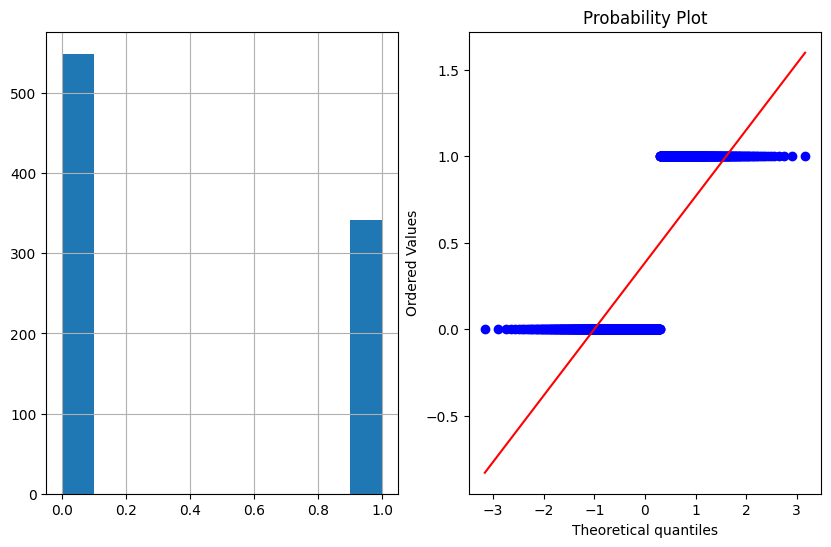

In [ ]:
plot_data(df, 'Survived')

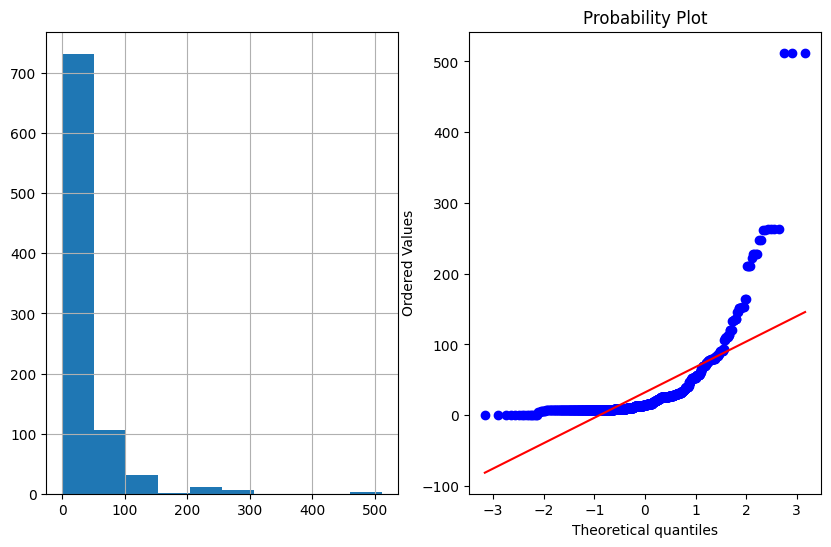

In [ ]:
plot_data(df, 'Fare')

### Logarithmic Transformation

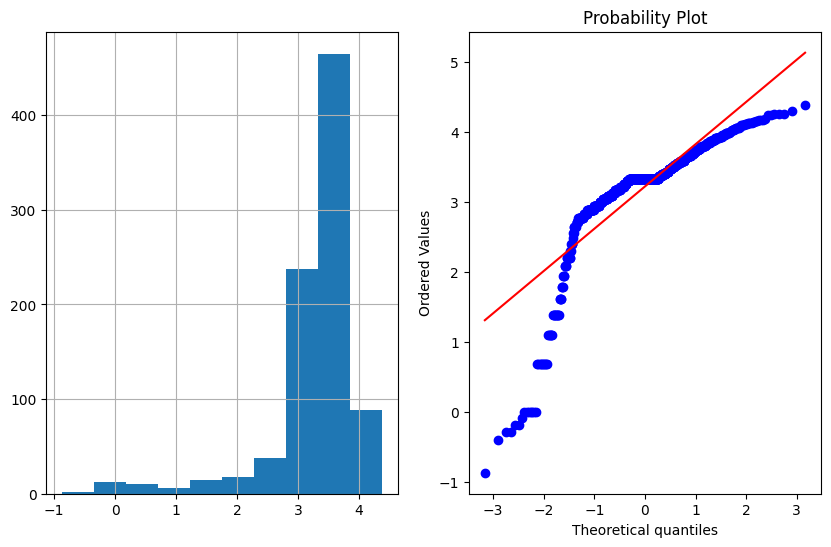

In [ ]:
df['Age_log'] = np.log(df['Age'])
plot_data(df, 'Age_log')

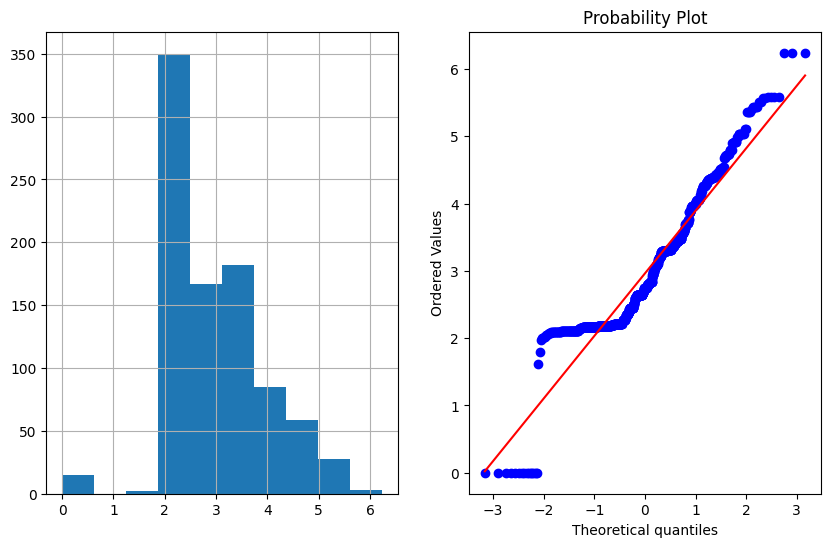

In [ ]:
df['Fare_log'] = np.log1p(df['Fare'])
plot_data(df, 'Fare_log')

### Reciprocal Tranformation

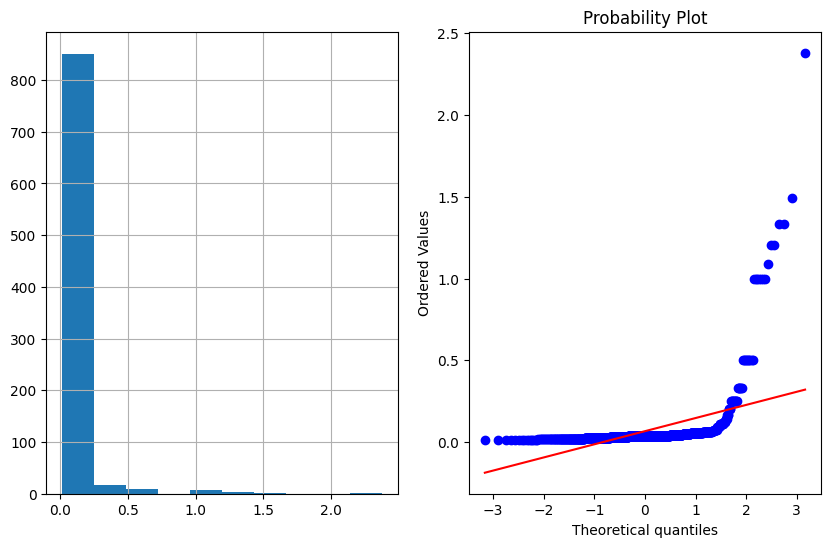

In [ ]:
df['Age_reciprocal'] = 1/df['Age']
plot_data(df,'Age_reciprocal')

### Square Root Transformation

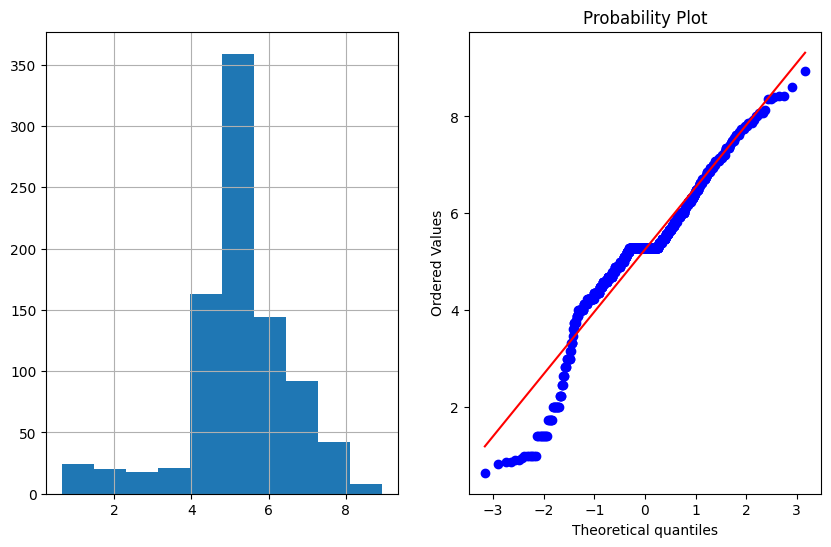

In [ ]:
df['Age_Square_root'] = df['Age'] ** (1/2)
plot_data(df, 'Age_Square_root')

### Exponential Transformation

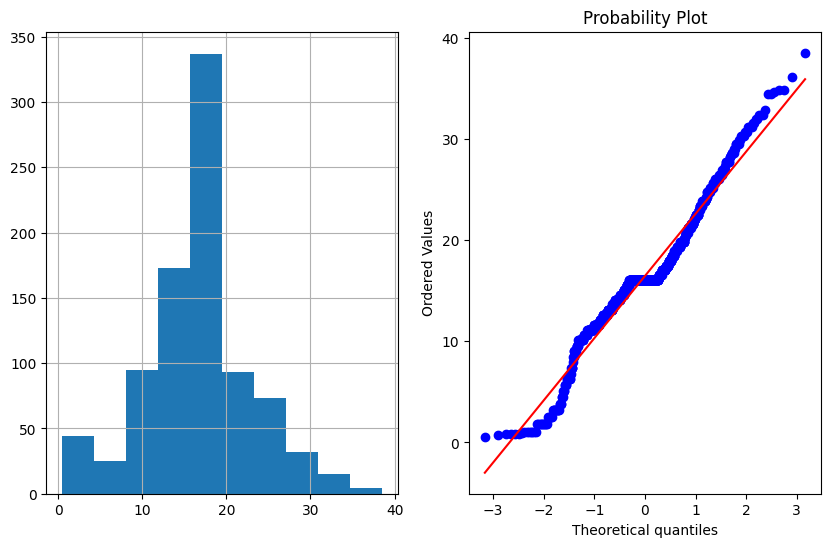

In [ ]:
df['Age_exponential'] = df.Age ** (1/1.2)
plot_data(df,'Age_exponential')

### BoxCOx Transformation
The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

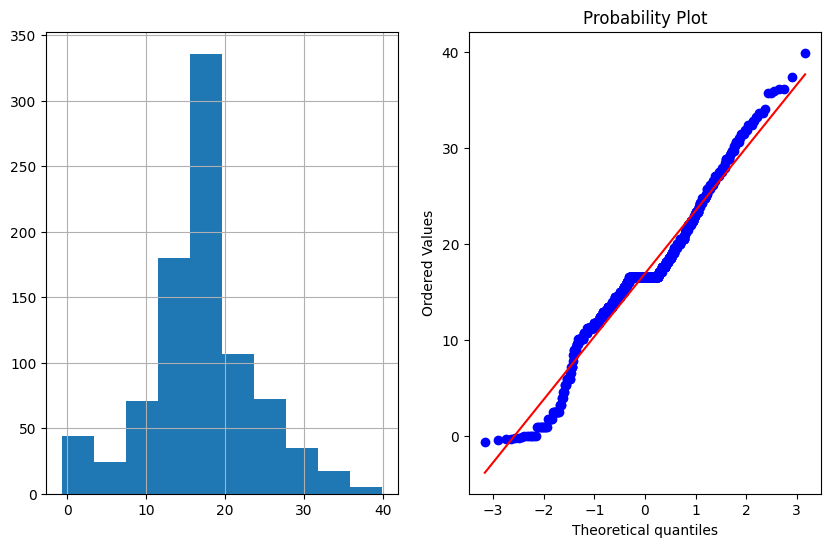

In [ ]:
df['Age_boxcox'], parameters = stat.boxcox(df['Age'])
plot_data(df, 'Age_boxcox')

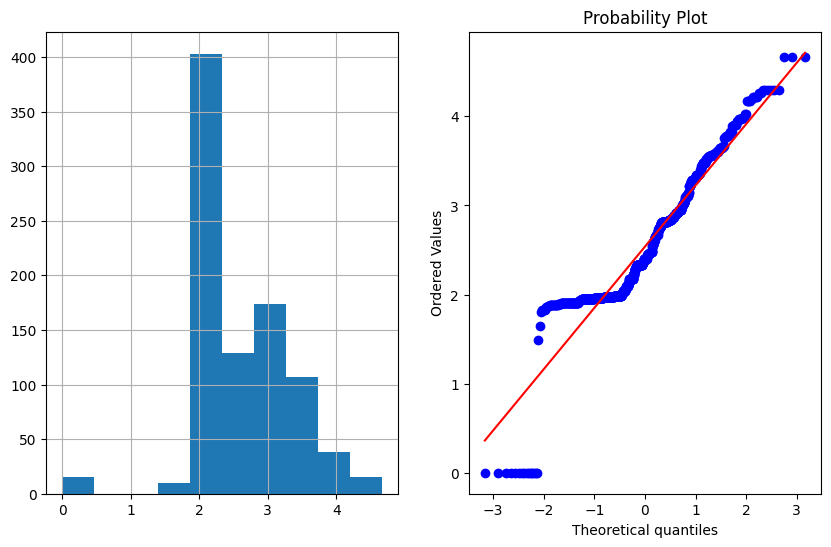

In [ ]:
df['Fare_boxcox'], parameters = stat.boxcox(df['Fare'] + 1)
plot_data(df, 'Fare_boxcox')

## Handling Imbalanced Dataset

In [ ]:
pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

pd.set_option('display.max_columns', None)

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.Class.value_counts().to_dict()

{0: 284315, 1: 492}

In [ ]:
# Independent Features
x = df.drop('Class', axis = 1)

# Dependent Feature
y = df.Class

### Logistic Regression - Cross Validation - KFold & HyperParameter Tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, GridSearchCV,train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

In [ ]:
from math import e
try:
  log_class = LogisticRegression()
  grid = {'C' : 10.0 ** np.arange(-2,3), 'penalty' : ['l1','l2']}
  cv = KFold(n_splits=5, shuffle= False, random_state= 42)
except Exception as e:
  print(e)

Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.


In [ ]:
log_class = LogisticRegression()
grid = {'C' : 10.0 ** np.arange(-2,3), 'penalty' : ['l1','l2']}
cv = KFold(n_splits=5, shuffle= False, random_state= None)

In [ ]:
clf = GridSearchCV(estimator=log_class, param_grid=grid, cv = cv, scoring='f1_macro', n_jobs=-1, error_score='raise')
clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [ ]:
y_pred = clf.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score:  0.9988296291094648
[[85249    49]
 [   51    94]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85298
           1       0.66      0.65      0.65       145

    accuracy                           1.00     85443
   macro avg       0.83      0.82      0.83     85443
weighted avg       1.00      1.00      1.00     85443



### Random Forest Classifier

#### Without Class Weight

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = classifier.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score:  0.999602073897218
[[85293     5]
 [   29   116]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85298
           1       0.96      0.80      0.87       145

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



#### With Class Weight

In [ ]:
class_weight = {
    0 : 1,
    1 : 100
}

In [ ]:
classifier = RandomForestClassifier(class_weight = class_weight)
classifier.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [ ]:
y_pred = classifier.predict(x_test)
print('accuracy score: ', accuracy_score(y_test, y_pred), '\n')
print('confusion matrix: \n', confusion_matrix(y_test, y_pred), '\n')
print('classification report: \n', classification_report(y_test, y_pred))

accuracy score:  0.9995669627705019 

confusion matrix: 
 [[85294     4]
 [   33   112]] 

classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85298
           1       0.97      0.77      0.86       145

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



### Under Sampling

In [ ]:
!pip install collections

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [ ]:
from collections import Counter

In [ ]:
Counter(y_train)

Counter({0: 199017, 1: 347})

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
ns = NearMiss(sampling_strategy=0.8)
x_train_ns, y_train_ns = ns.fit_resample(x_train, y_train)
print(f"No of classes before under sampling - {Counter(y_train)}")
print(f"No of classes after under sampling - {Counter(y_train_ns)}")

No of classes before under sampling - Counter({0: 199017, 1: 347})
No of classes after under sampling - Counter({0: 433, 1: 347})


In [ ]:
433 * 0.8

346.40000000000003

#### Random Forest Classifier

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(x_train_ns, y_train_ns)

RandomForestClassifier()

In [ ]:
y_pred = classifier.predict(x_test)
print('accuracy score: ', accuracy_score(y_test, y_pred), '\n')
print('confusion matrix: \n', confusion_matrix(y_test, y_pred), '\n')
print('classification report: \n', classification_report(y_test, y_pred))

accuracy score:  0.9162599627822057 

confusion matrix: 
 [[78154  7144]
 [   11   134]] 

classification report: 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     85298
           1       0.02      0.92      0.04       145

    accuracy                           0.92     85443
   macro avg       0.51      0.92      0.50     85443
weighted avg       1.00      0.92      0.95     85443



### Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(sampling_strategy=0.75)
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

print(f"before over sampling: {Counter(y_train)}")
print(f"after over sampling : {Counter(y_train_ros)}")

before over sampling: Counter({0: 199017, 1: 347})
after over sampling : Counter({0: 199017, 1: 149262})


In [ ]:
(70/100)*199017

139311.9

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train_ros, y_train_ros)

y_pred = classifier.predict(x_test)
print("Accuracy Score: \n", accuracy_score(y_test, y_pred), '\n')
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred), '\n')
print("Classification Report: \n", classification_report(y_test, y_pred), '\n')

Accuracy Score: 
 0.9996137776061234 

Confusion Matrix: 
 [[85294     4]
 [   29   116]] 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85298
           1       0.97      0.80      0.88       145

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443
 



### SMOTETomek

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
smote = SMOTETomek(sampling_strategy=0.75)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [ ]:
print("before applying smote: ", Counter(y_train))
print("after applying smote: ", Counter(y_train_smote))

before applying smote:  Counter({0: 199017, 1: 347})
after applying smote:  Counter({0: 198205, 1: 148450})


#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(x_train_smote, y_train_smote)

y_pred = classifier.predict(x_test)
print("Accuracy Score: \n", accuracy_score(y_test, y_pred), '\n')
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred), '\n')
print("Classification Report: \n", classification_report(y_test, y_pred), '\n')

Accuracy Score: 
 0.9995669627705019 

Confusion Matrix: 
 [[85284    14]
 [   23   122]] 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85298
           1       0.90      0.84      0.87       145

    accuracy                           1.00     85443
   macro avg       0.95      0.92      0.93     85443
weighted avg       1.00      1.00      1.00     85443
 



## Discussion Related With Outliers & Impact On ML

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
pd.set_option("display.max_columns", None)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<ipython-input-5-968cc56db096>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde=True, color = 'red')


<Axes: xlabel='Age', ylabel='Density'>

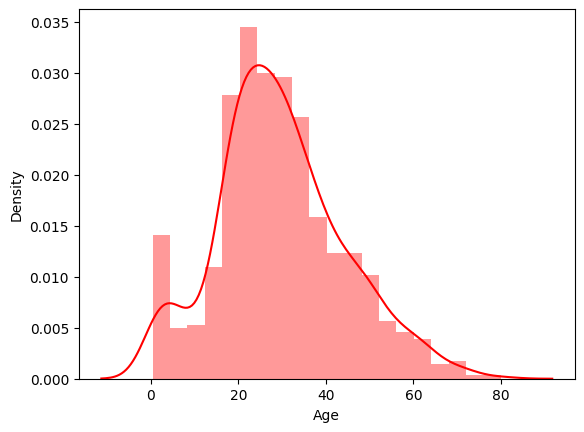

In [ ]:
sns.distplot(df['Age'], kde=True, color = 'red')

<ipython-input-6-13f869ba36c1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(), kde=True, color = 'red')


<Axes: xlabel='Age', ylabel='Density'>

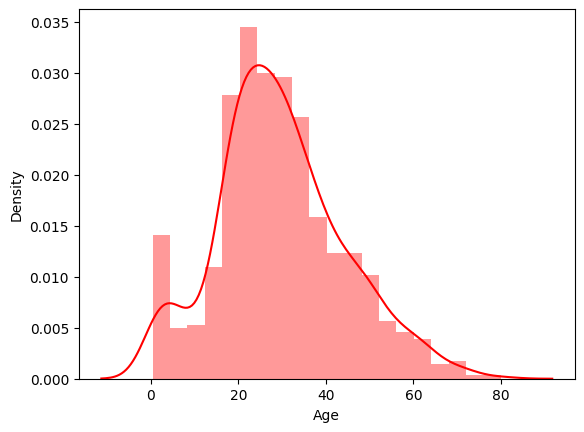

In [ ]:
sns.distplot(df['Age'].dropna(), kde=True, color = 'red')

<ipython-input-7-227ff2b0c2b4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].fillna(100), kde=True, color = 'red')


<Axes: xlabel='Age', ylabel='Density'>

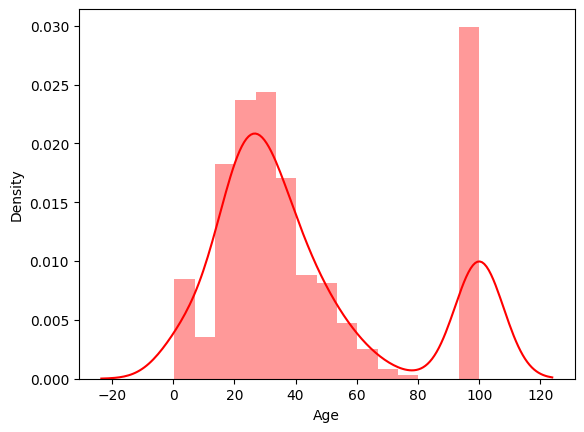

In [ ]:
sns.distplot(df['Age'].fillna(100), kde=True, color = 'red')

### Understanding the distribution of data and Finding out the boundaries of the outliers

Age Distribution

Text(0, 0.5, 'No of Passengers')

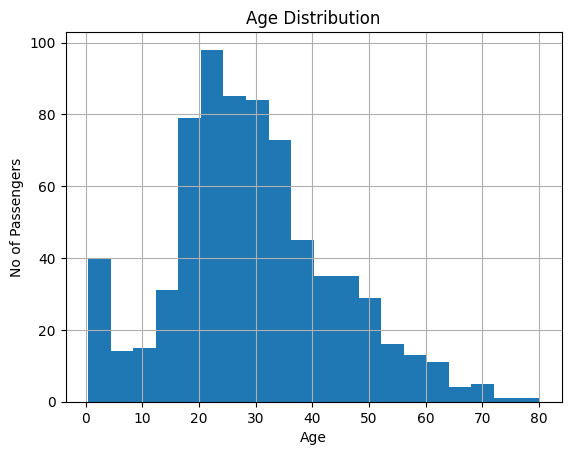

In [ ]:
figure = df.Age.hist(bins = 20)
figure.set_title('Age Distribution')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passengers')

* Gaussian Distribution

<Axes: >

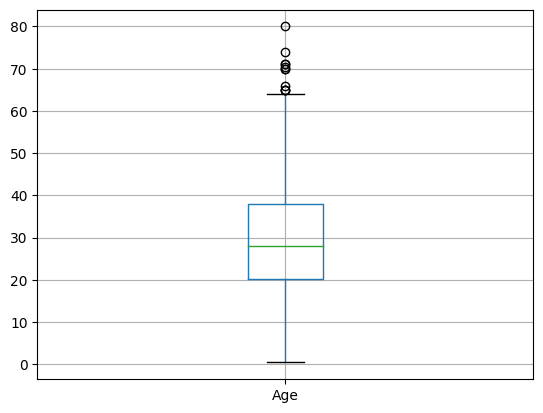

In [ ]:
df.boxplot('Age')

In [ ]:
df[['Age']].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


Assuming the age follows normal /gaussian distribution, so, I need to figure out the lower fence and upper fence, which differentiates the outliers.

In [ ]:
upper_boundary = df['Age'].mean() + 3 * df['Age'].std()
lower_boundary = df['Age'].mean() - 3 * df['Age'].std()

print("upper_boundary: ", upper_boundary)
print("lower_boundary: ", lower_boundary)
print("mean: ", df['Age'].mean())
print("standard deviation: ", df['Age'].std())

upper_boundary:  73.27860964406094
lower_boundary:  -13.880374349943303
mean:  29.69911764705882
standard deviation:  14.526497332334042


In [ ]:
IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)
IQR

17.875

In [ ]:
upper_bridge = df.Age.quantile(0.75) + (1.5 * IQR)
lower_bridge = df.Age.quantile(0.25) - (1.5 * IQR)

print("upper bridge: ", upper_bridge)
print("lower bridge: ", lower_bridge)

upper bridge:  64.8125
lower bridge:  -6.6875


In [ ]:
extreme_upper_bridge = df.Age.quantile(0.75) + (3 * IQR)
extreme_lower_bridge = df.Age.quantile(0.25) - (3 * IQR)

print("extreme upper bridge: ", extreme_upper_bridge)
print("extreme lower bridge: ", extreme_lower_bridge)

extreme upper bridge:  91.625
extreme lower bridge:  -33.5


Fare Distribution

Text(0, 0.5, 'No of Passengers')

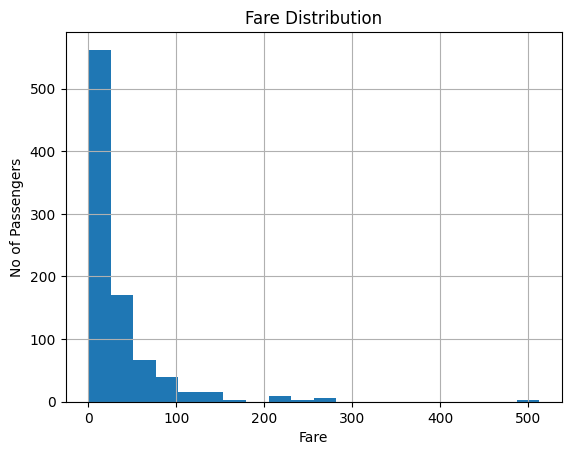

In [ ]:
figure = df.Fare.hist(bins = 20)
figure.set_title('Fare Distribution')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passengers')

* Right Skewed Distribution

<Axes: >

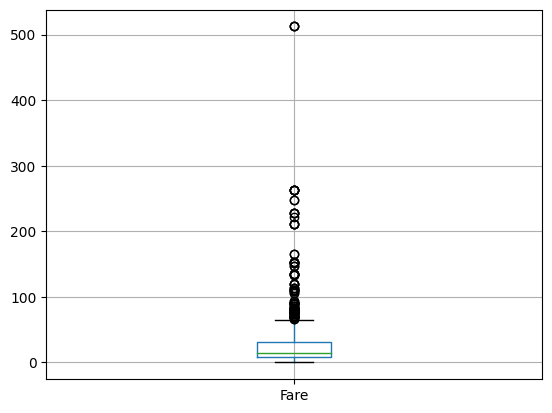

In [ ]:
df.boxplot('Fare')

In [ ]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
upper_boundary = df['Fare'].mean() + 3 * df['Fare'].std()
lower_boundary = df['Fare'].mean() - 3 * df['Fare'].std()

print("upper_boundary: ", upper_boundary)
print("lower_boundary: ", lower_boundary)
print("mean: ", df['Fare'].mean())
print("standard deviation: ", df['Fare'].std())

upper_boundary:  181.2844937601173
lower_boundary:  -116.87607782296804
mean:  32.204207968574636
standard deviation:  49.6934285971809


In [ ]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

upper_bridge = df.Fare.quantile(0.75) + (IQR * 1.5)
lower_bridge = df.Fare.quantile(0.25) - (IQR * 1.5)

extreme_upper_bridge = df.Fare.quantile(0.75) + (IQR * 3)
extreme_lower_bridge = df.Fare.quantile(0.25) - (IQR * 3)

print("IQR: ", IQR)
print("upper_bridge: ", upper_bridge)
print("lower_bridge: ",lower_bridge)
print("extreme_upper_bridge: ", extreme_upper_bridge)
print("extreme_lower_bridge: ", extreme_lower_bridge)

IQR:  23.0896
upper_bridge:  65.6344
lower_bridge:  -26.724
extreme_upper_bridge:  100.2688
extreme_lower_bridge:  -61.358399999999996


### Trying to remove the outliers

In [ ]:
data = df.copy()

In [ ]:
data.loc[data['Age'] > 73, 'Age'] = 73

In [ ]:
data[data['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<Axes: >

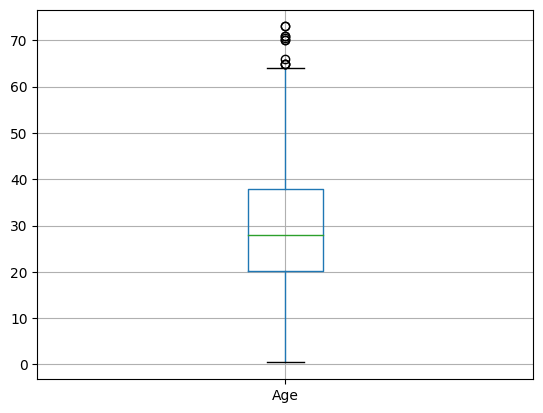

In [ ]:
data.boxplot('Age')

In [ ]:
data.loc[data['Fare'] > 100, 'Fare'] = 100

<Axes: >

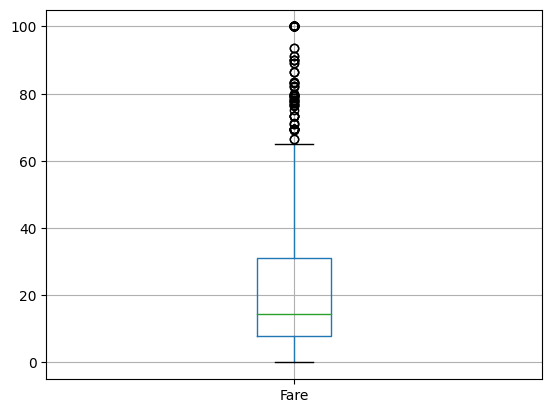

In [ ]:
data.boxplot('Fare')

### Creating train - test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['Age', 'Fare']].fillna(0),data['Survived'], test_size = 0.7)

#### Applying Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
y_pred_proba = classifier.predict_proba(x_test)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy Score: {accuracy}")
print(f"ROC_AUC Score: {roc_auc}")

Accuracy Score: 0.6826923076923077
ROC_AUC Score: 0.6799090510628972


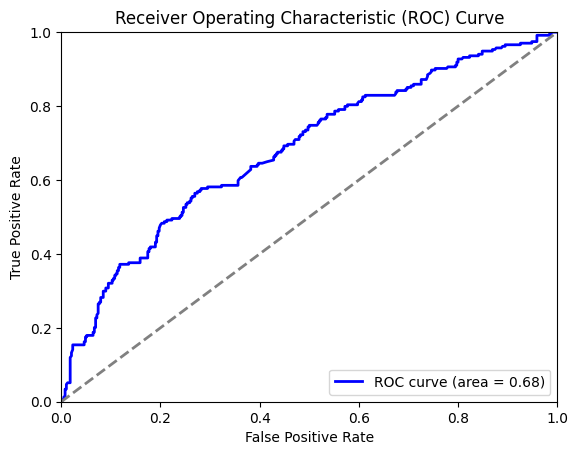

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Applying Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.6105769230769231


## All Types of Feature transformation

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
pd.set_option("display.max_columns", None)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv", usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [ ]:
df.isna().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [ ]:
df.Age.fillna(df.Age.median(), inplace = True)

In [ ]:
df.Age.isna().sum()

0

In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: (891, 3)
y shape: (891,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled

array([[-1.63788124, -1.91971935,  0.98099823],
       [ 0.80326712, -0.0772525 , -0.46963364],
       [ 0.80326712, -2.15002771, -0.40613632],
       ...,
       [ 0.80326712,  0.92075038, -0.34778742],
       [-1.63788124, -1.15202483,  1.72907416],
       [-1.63788124, -0.61463866,  0.8913508 ]])

In [ ]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled

array([[ 8.03267115e-01, -7.72524961e-02, -3.25477555e-01],
       [-4.17307062e-01,  1.53055861e-01, -4.18557274e-01],
       [ 8.03267115e-01, -6.91408115e-01, -4.69060935e-01],
       [-4.17307062e-01, -1.76618045e+00,  2.27368556e-02],
       [ 8.03267115e-01, -1.15202483e+00, -4.04010258e-01],
       [-1.63788124e+00, -2.30791401e-01,  9.21996226e-01],
       [ 8.03267115e-01, -7.72524961e-02, -4.72493223e-01],
       [ 8.03267115e-01, -9.98485925e-01, -2.71459231e-01],
       [ 8.03267115e-01, -9.98485925e-01, -4.72493223e-01],
       [-1.63788124e+00, -7.68177567e-01, -1.08998268e-01],
       [-1.63788124e+00,  6.13672575e-01,  4.16959611e-01],
       [ 8.03267115e-01,  1.15105874e+00, -4.66609301e-01],
       [ 8.03267115e-01, -7.72524961e-02, -1.25014303e-01],
       [ 8.03267115e-01,  7.62864086e-02, -4.82790086e-01],
       [-4.17307062e-01,  5.36903123e-01, -3.69524593e-01],
       [-1.63788124e+00, -9.98485925e-01,  1.48260519e-01],
       [-1.63788124e+00,  9.97519837e-01

### Model Building
- fit() for training and predict for test

In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [ ]:
model.predict(x_test_scaled)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
df_scaled = scaler.transform(df)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Survived


## Importing Kaggle dataset from web

In [ ]:
!wget https://www.kaggle.com/datasets/zalando-research/fashionmnist/download?datasetVersionNumber=4

--2024-05-28 13:03:58--  https://www.kaggle.com/datasets/zalando-research/fashionmnist/download?datasetVersionNumber=4
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fzalando-research%2Ffashionmnist%2Fversions%2F4%3Fresource%3Ddownload [following]
--2024-05-28 13:03:58--  https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fzalando-research%2Ffashionmnist%2Fversions%2F4%3Fresource%3Ddownload
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘download?datasetVersionNumber=4’

download?datasetVer     [ <=>                ]   5.14K  --.-KB/s

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/sample_data/california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


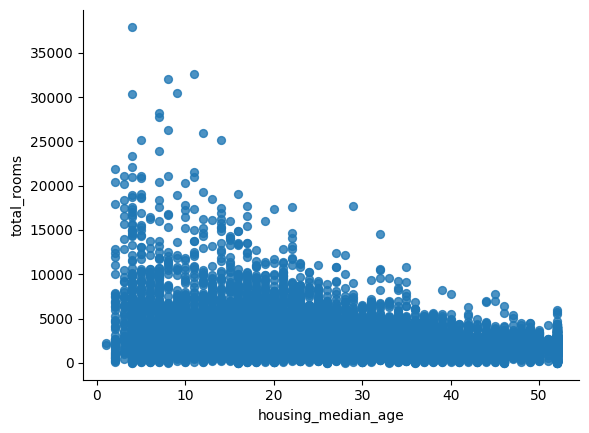

In [ ]:
# @title housing_median_age vs total_rooms

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='housing_median_age', y='total_rooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Section II - Practice

In [ ]:
pd.i

In [ ]:
import pandas as pd

# Read the CSV files
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Advanced-House-Price-Prediction-/refs/heads/master/train.csv')
df1 = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Advanced-House-Price-Prediction-/refs/heads/master/test.csv')

# Combine row-wise
combined_df = pd.concat([df, df1], axis=0, ignore_index=True)

# Display combined dataframe
print(combined_df.shape)
combined_df.head()



(2919, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [ ]:
# Example: Merging on the 'Id' column
merged_df = pd.merge(df, df1, on='Id', how='inner')  # Options for 'how': 'inner', 'outer', 'left', 'right'

# Display merged dataframe
print(merged_df.shape)
merged_df.head()



(0, 160)


,Id,MSSubClass_x,MSZoning_x,LotFrontage_x,LotArea_x,Street_x,Alley_x,LotShape_x,LandContour_x,Utilities_x,...,ScreenPorch_y,PoolArea_y,PoolQC_y,Fence_y,MiscFeature_y,MiscVal_y,MoSold_y,YrSold_y,SaleType_y,SaleCondition_y
